In [1]:
# Install required packages if not already installed
!pip install plotly

In [27]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN

In [7]:
# Set style for better visualizations
sns.set_theme(style="whitegrid")  #
sns.set_palette("husl")

In [8]:
df = pd.read_csv('Dataset.csv')

In [20]:
###################################### EDA  #############################################3

In [10]:
# Basic information
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
display(df.head())

Dataset shape: (6819, 96)

First few rows:


Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [11]:
# Check data types and missing values
print(f"\nData types:")
display(df.dtypes)
print(f"\nMissing values count:")
display(df.isnull().sum())

# Basic statistics
print(f"\nBasic statistics:")
display(df.describe())


Data types:


Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object


Missing values count:


Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


Basic statistics:


Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

Class distribution:
Bankrupt?
0    6599
1     220
Name: count, dtype: int64
Percentage distribution:
Non-bankrupt (0): 96.77%
Bankrupt (1): 3.23%


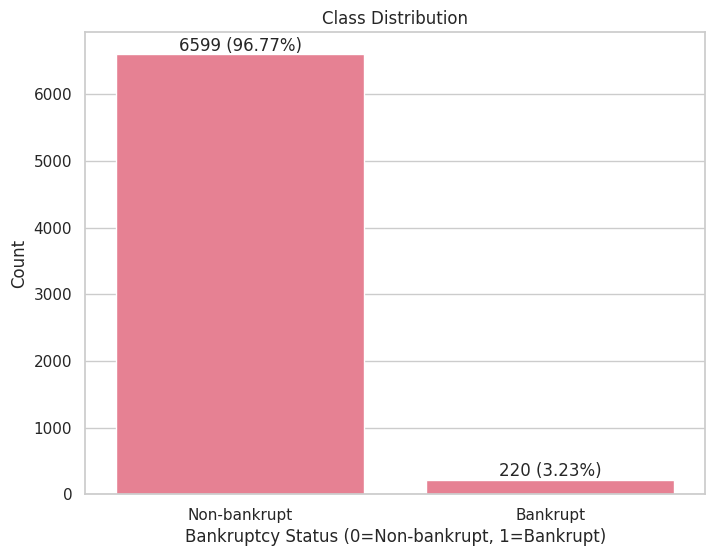

In [15]:
# Check class distribution
target_counts = df['Bankrupt?'].value_counts()
print(f"Class distribution:\n{target_counts}")
print(f"Percentage distribution:")
print(f"Non-bankrupt (0): {target_counts[0]/len(df)*100:.2f}%")
print(f"Bankrupt (1): {target_counts[1]/len(df)*100:.2f}%")

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Bankrupt?', data=df)
plt.title('Class Distribution')
plt.xlabel('Bankruptcy Status (0=Non-bankrupt, 1=Bankrupt)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-bankrupt', 'Bankrupt'])
for i, count in enumerate(target_counts):
    plt.text(i, count + 50, f"{count} ({count/len(df)*100:.2f}%)", ha='center')
plt.show()

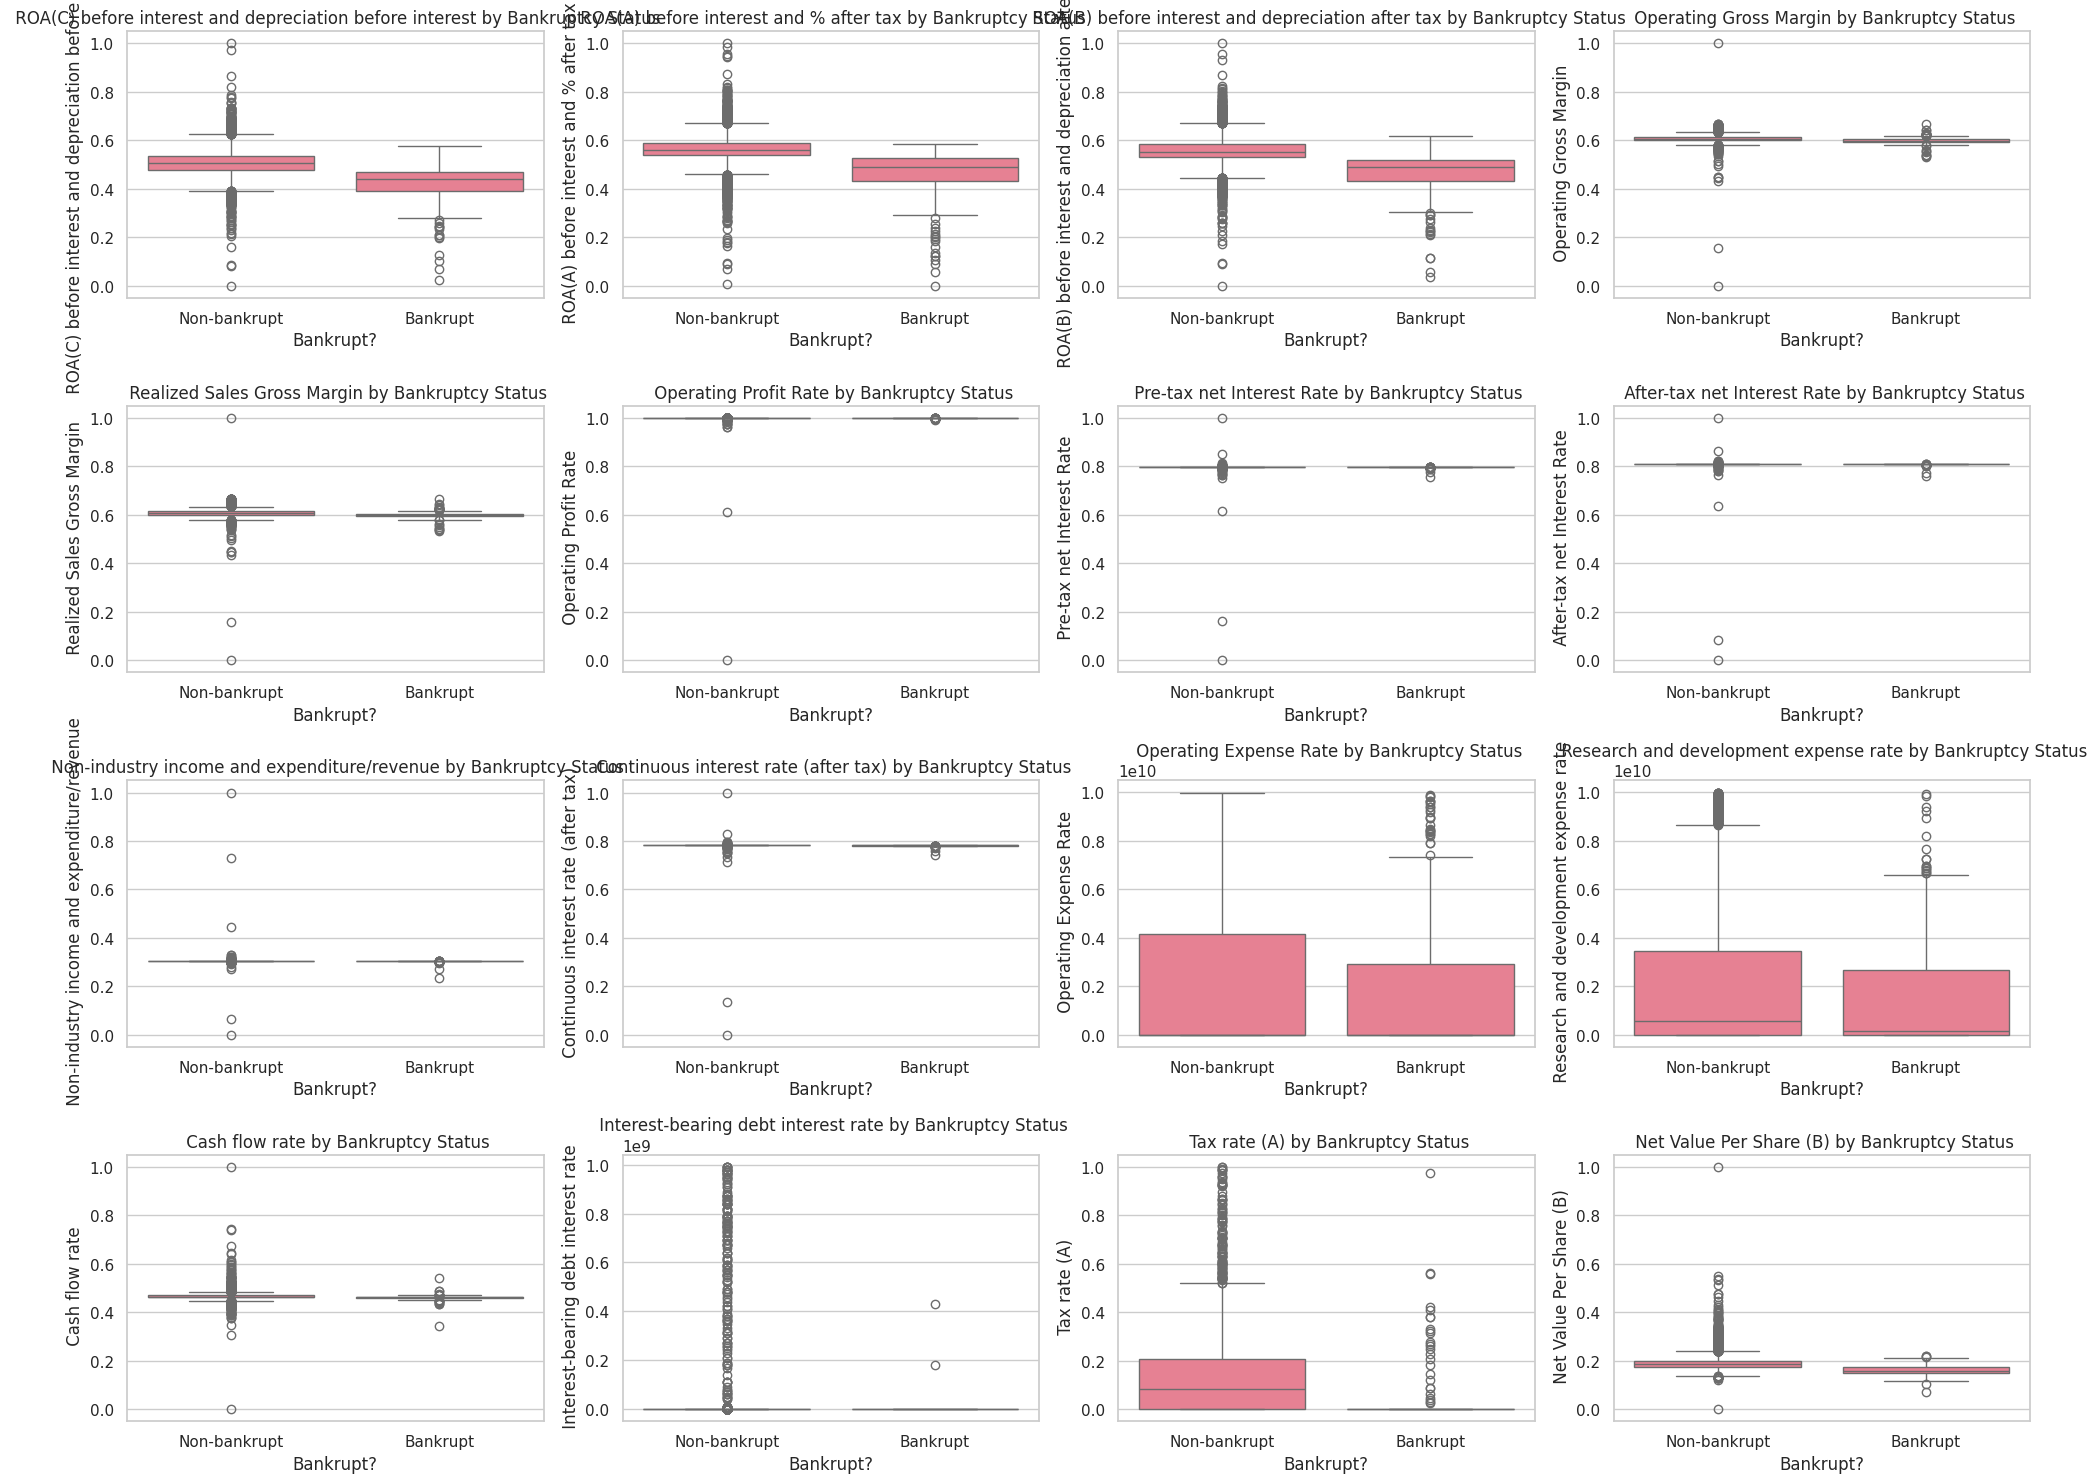

In [17]:
# Plot boxplots to identify outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols[:16]):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x='Bankrupt?', y=col, data=df)
    plt.title(f'{col} by Bankruptcy Status')
    plt.xticks([0, 1], ['Non-bankrupt', 'Bankrupt'])
plt.tight_layout()
plt.show()

Dataset dimensions: (6819, 96)

Feature Type Distribution:
float64    93
int64       3
Name: count, dtype: int64

No missing values found.

Top 10 positively correlated features:
Bankrupt?                               1.000000
 Debt ratio %                           0.250161
 Current Liability to Assets            0.194494
 Borrowing dependency                   0.176543
 Current Liability to Current Assets    0.171306
 Liability to Equity                    0.166812
 Current Liabilities/Equity             0.153828
 Current Liability to Equity            0.153828
 Liability-Assets Flag                  0.139212
 Total expense/Assets                   0.139049
 Equity to Long-term Liability          0.139014
Name: Bankrupt?, dtype: float64

Top 10 negatively correlated features:
Per Share Net profit before tax (Yuan ¥)                  -0.201395
Net profit before tax/Paid-in capital                     -0.207857
Retained Earnings to Total Assets                         -0.217779
Persis

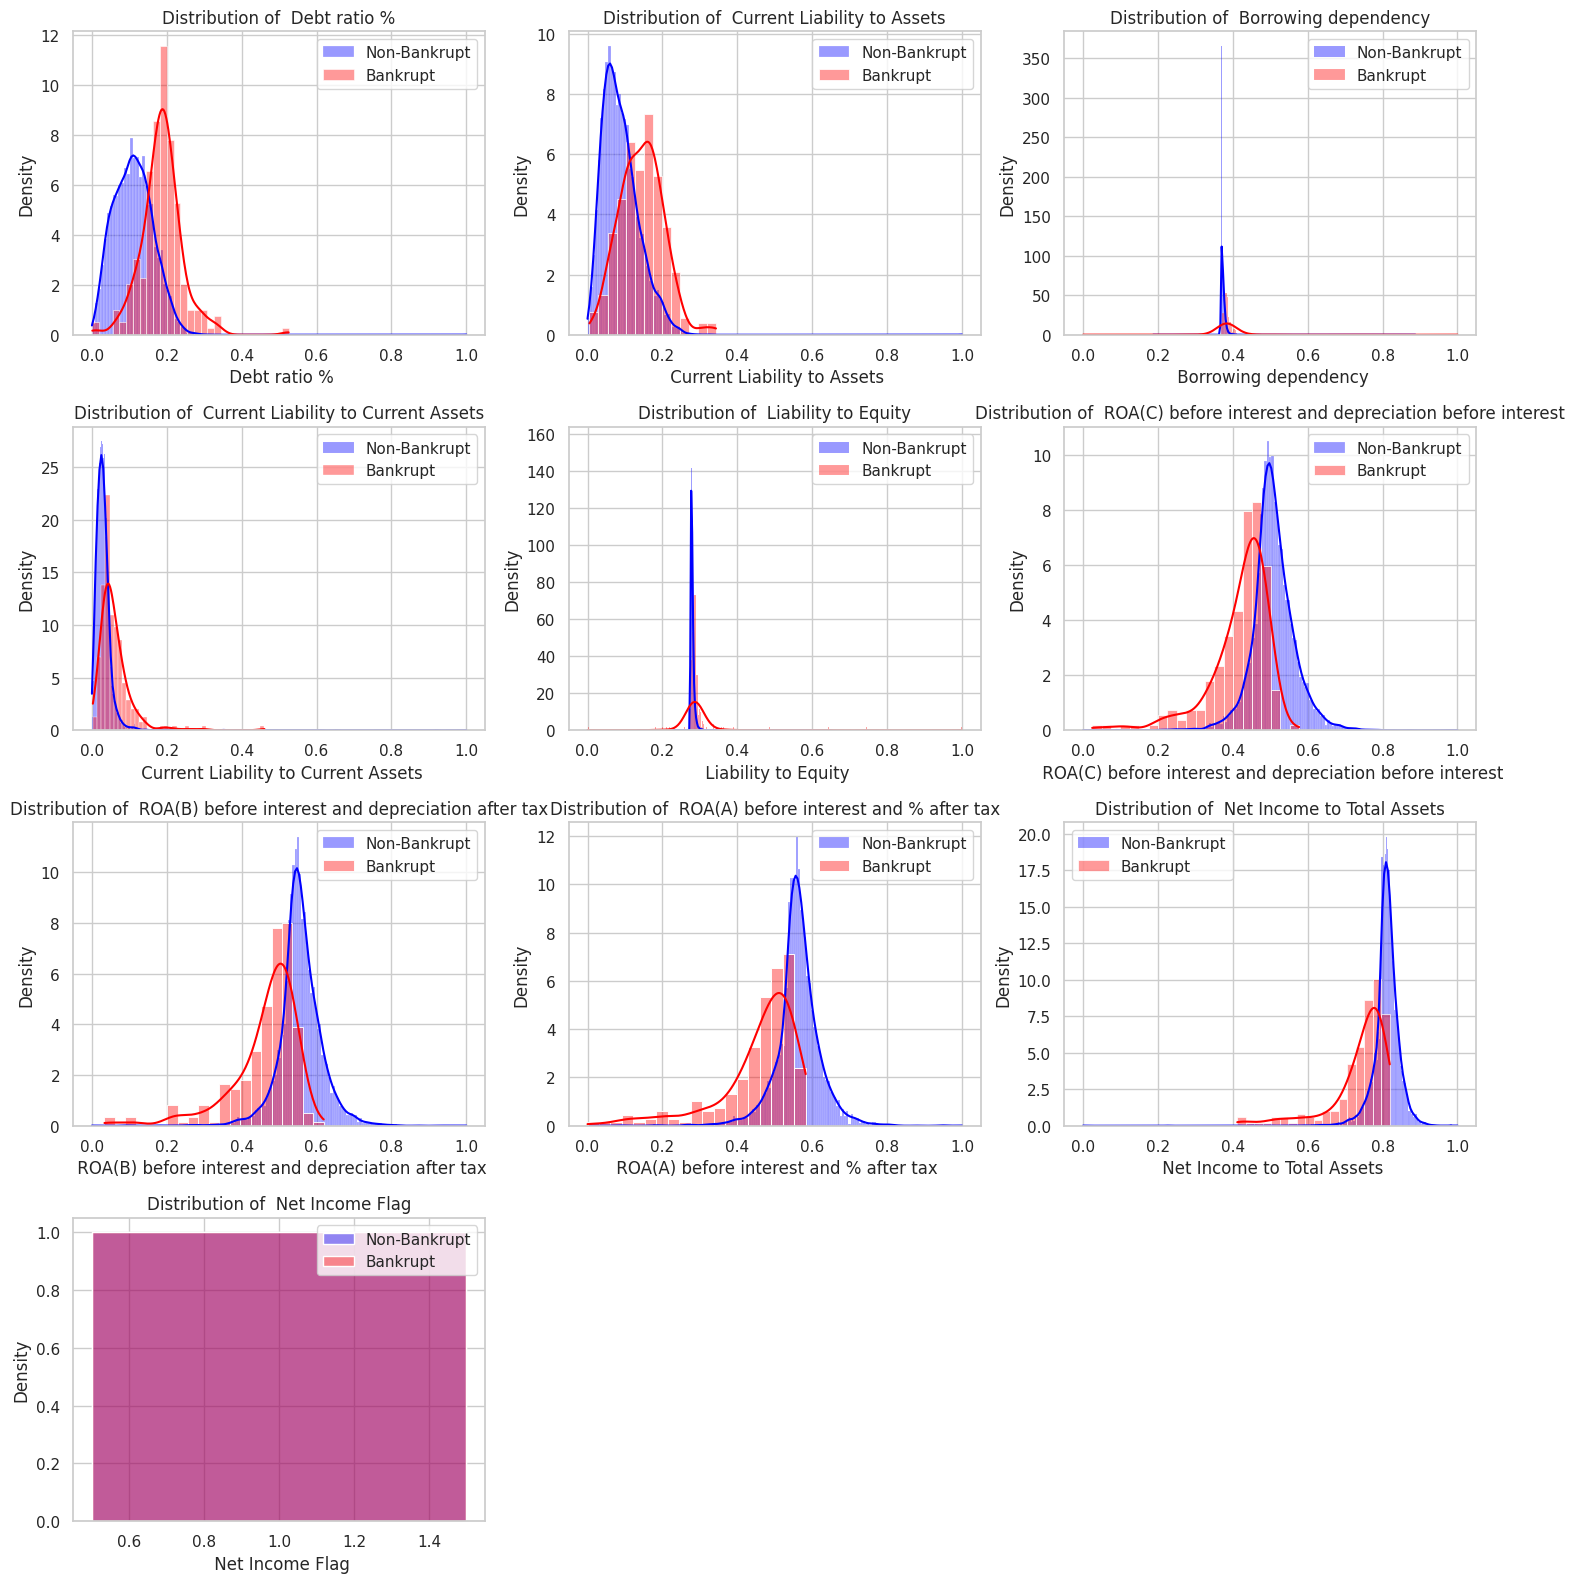

In [19]:
def efficient_feature_analysis(df, target_col='Bankrupt?'):
    """
    Perform efficient feature analysis for large datasets
    """
    print(f"Dataset dimensions: {df.shape}")

    # 1. Feature types summary
    print("\nFeature Type Distribution:")
    print(df.dtypes.value_counts())

    # 2. Missing values summary
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print("\nFeatures with missing values:")
        print(missing[missing > 0])
    else:
        print("\nNo missing values found.")

    # 3. Feature correlation with target (Focus on top/bottom 10)
    corr_with_target = df.corr()[target_col].sort_values(ascending=False)

    print("\nTop 10 positively correlated features:")
    print(corr_with_target.head(11))  # Including target itself

    print("\nTop 10 negatively correlated features:")
    print(corr_with_target.tail(10))

    # 4. Focused comparison for top features
    top_pos_features = corr_with_target.head(6).index.tolist()
    if target_col in top_pos_features:
        top_pos_features.remove(target_col)

    top_neg_features = corr_with_target.tail(5).index.tolist()

    # Combined top correlated features
    top_features = top_pos_features + top_neg_features

    print("\nDistribution of Top Correlated Features by Bankruptcy Status:")
    for feature in top_features:
        bankrupt = df[df[target_col] == 1][feature]
        non_bankrupt = df[df[target_col] == 0][feature]

        print(f"\nFeature: {feature}")
        print(f"Correlation with Bankruptcy: {corr_with_target[feature]:.4f}")
        print(f"Non-Bankrupt (0): mean={non_bankrupt.mean():.4f}, median={non_bankrupt.median():.4f}, std={non_bankrupt.std():.4f}")
        print(f"Bankrupt (1): mean={bankrupt.mean():.4f}, median={bankrupt.median():.4f}, std={bankrupt.std():.4f}")
        print(f"Difference (1-0): mean={bankrupt.mean()-non_bankrupt.mean():.4f}, median={bankrupt.median()-non_bankrupt.median():.4f}")

    return top_features

# 5. Only create visualizations for the most important features
def plot_important_features(df, features, target_col='Bankrupt?'):
    """
    Create visualizations for only the most important features
    """
    n = len(features)
    if n == 0:
        return

    # Determine grid layout
    cols = min(3, n)
    rows = (n + cols - 1) // cols

    # Create figure
    fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))

    # Make sure axes is array-like for consistent indexing
    if rows == 1 and cols == 1:
        axes = np.array([axes])
    elif rows == 1 or cols == 1:
        axes = axes.flatten()

    # Create plots
    for i, feature in enumerate(features):
        # Calculate row and column indices
        r, c = i // cols, i % cols

        # Get current axis
        if rows == 1 or cols == 1:
            ax = axes[i]
        else:
            ax = axes[r, c]

        # Create density plot with histograms
        for target_val, label, color in zip([0, 1], ['Non-Bankrupt', 'Bankrupt'], ['blue', 'red']):
            data = df[df[target_col] == target_val][feature].dropna()
            sns.histplot(
                data=data,
                ax=ax,
                color=color,
                label=label,
                kde=True,
                stat="density",
                alpha=0.4
            )

        # Set title and legend
        ax = plt.gca() if ax is None else ax
        ax.set_title(f'Distribution of {feature}')
        ax.legend()

    # Hide empty subplots
    for j in range(i+1, rows*cols):
        r, c = j // cols, j % cols
        if rows == 1 or cols == 1:
            if j < len(axes):
                axes[j].set_visible(False)
        else:
            axes[r, c].set_visible(False)

    plt.tight_layout()
    plt.show()

# Usage
top_features = efficient_feature_analysis(df)
plot_important_features(df, top_features)

In [22]:
################################ Dimensionality reducation

Removing 22 highly correlated features with threshold 0.85
Features after correlation removal: 73


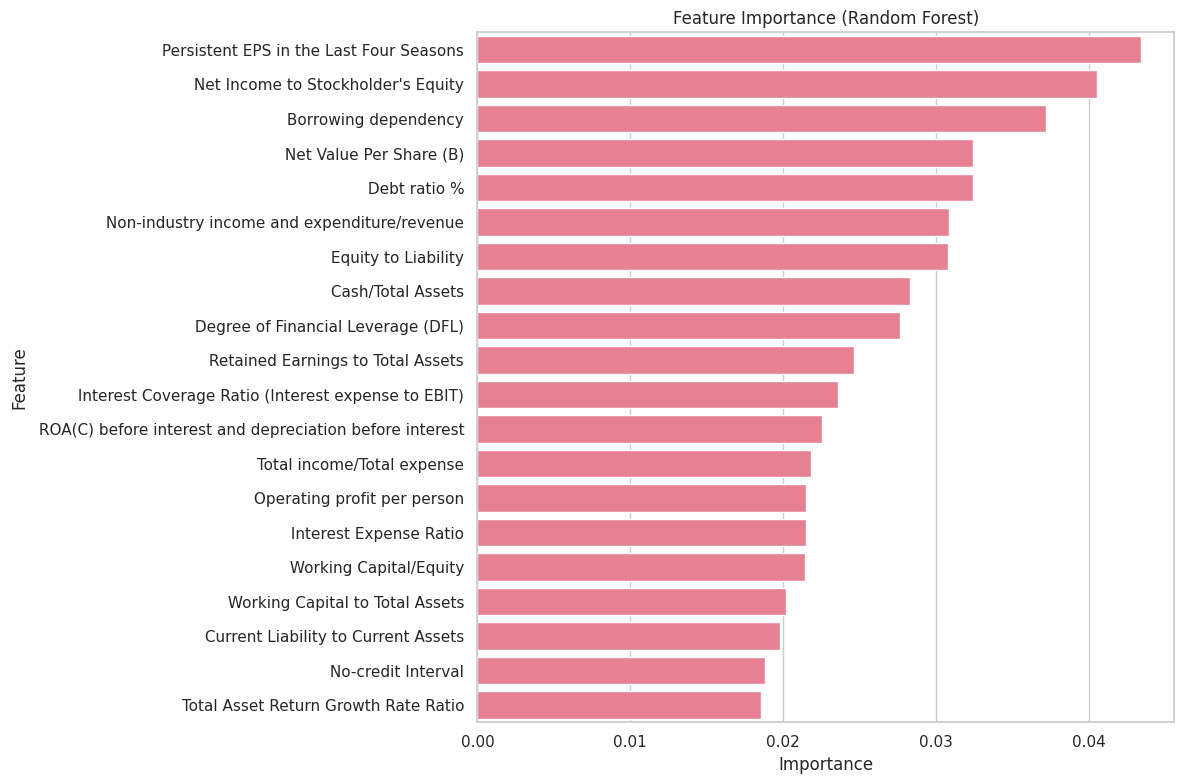

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [71] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


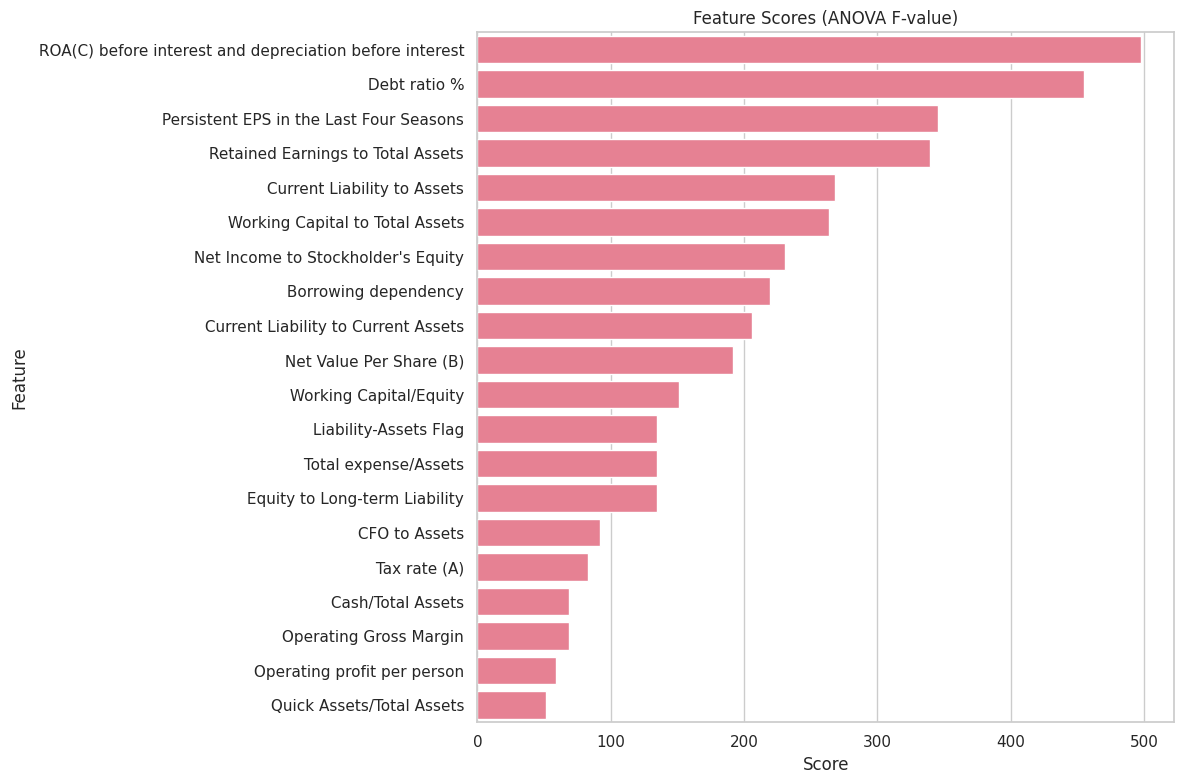

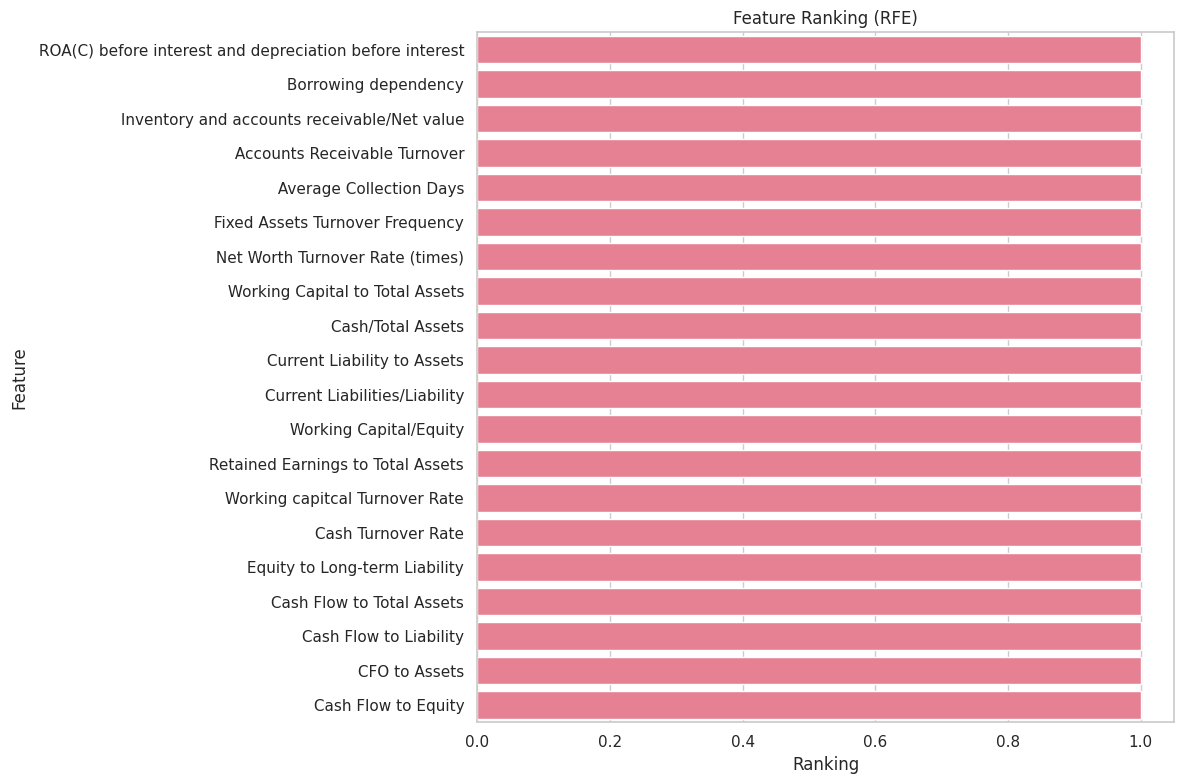

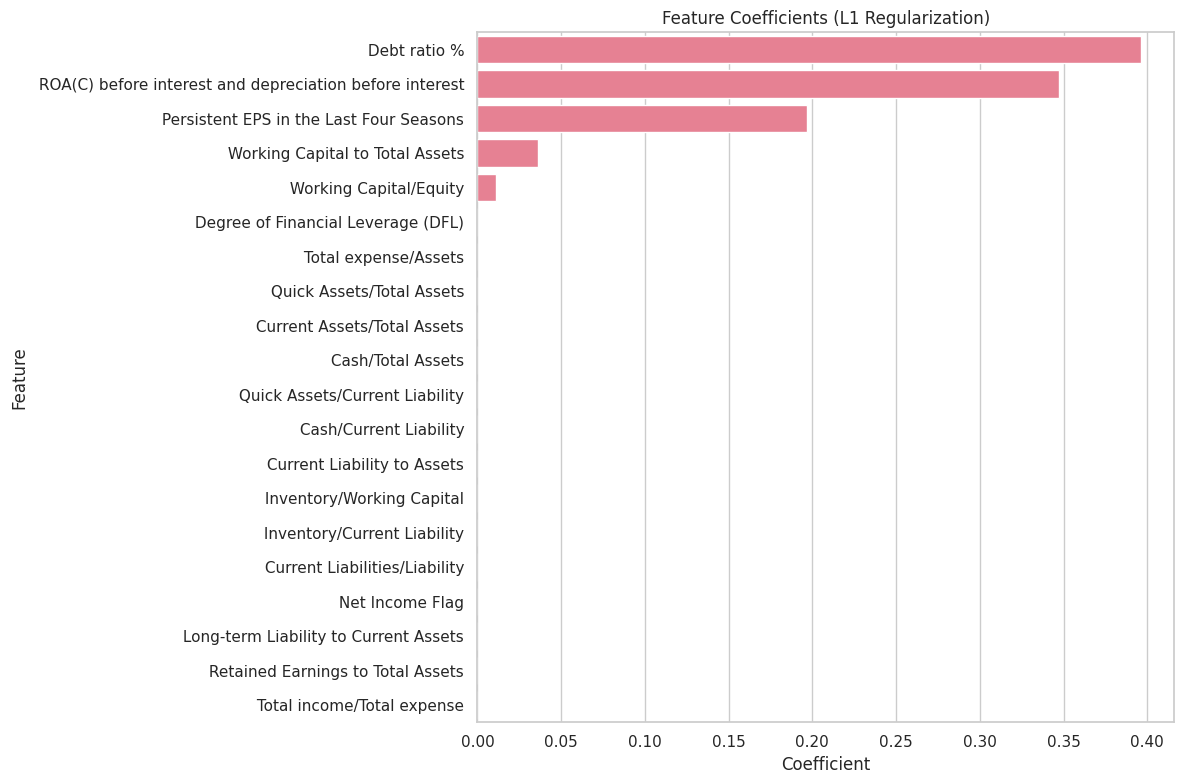

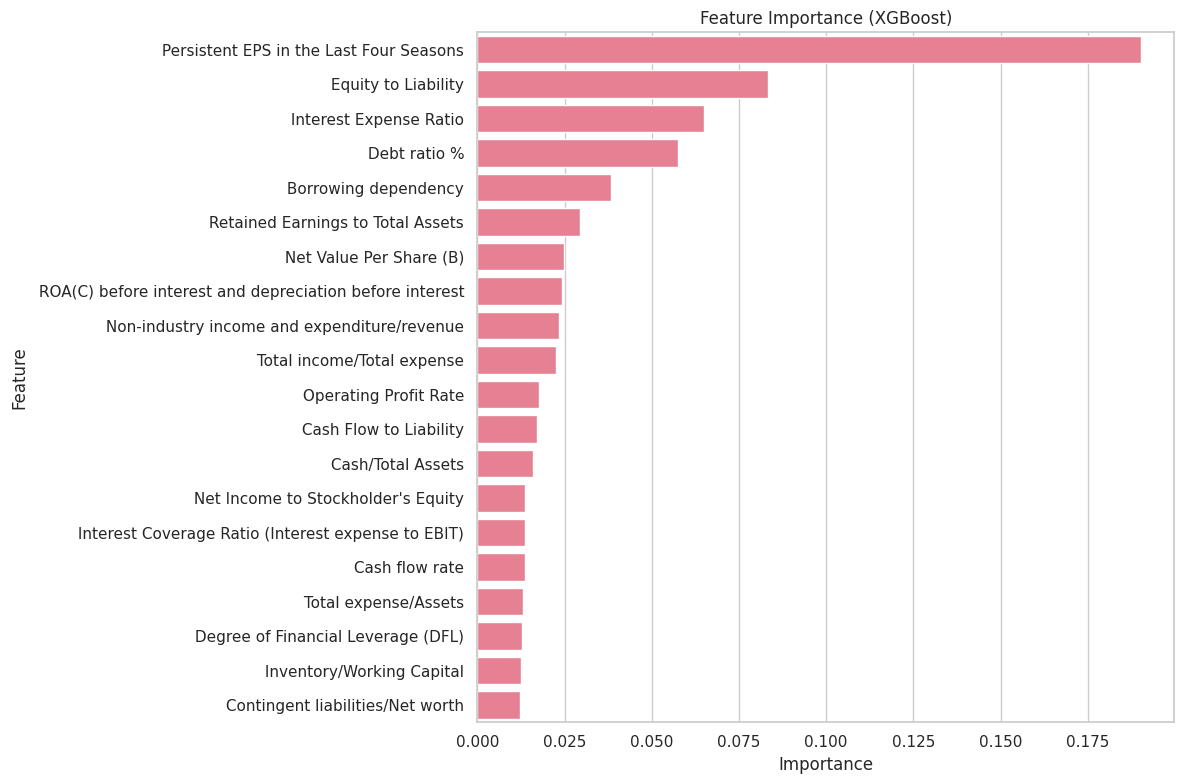

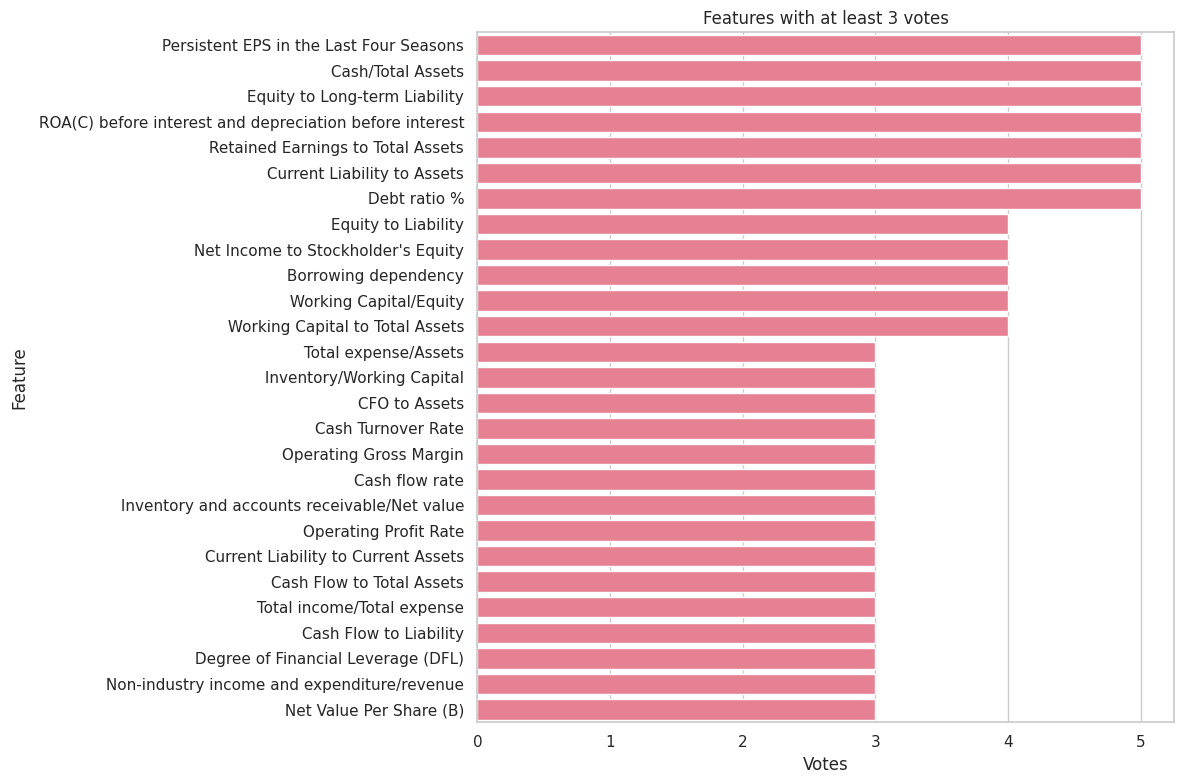

Found 27 consensus features with at least 3 votes
Final feature set size: 27

Final selected features:
-  Persistent EPS in the Last Four Seasons
-  Cash/Total Assets
-  Equity to Long-term Liability
-  ROA(C) before interest and depreciation before interest
-  Retained Earnings to Total Assets
-  Current Liability to Assets
-  Debt ratio %
-  Equity to Liability
-  Net Income to Stockholder's Equity
-  Borrowing dependency
-  Working Capital/Equity
-  Working Capital to Total Assets
-  Total expense/Assets
-  Inventory/Working Capital
-  CFO to Assets
-  Cash Turnover Rate
-  Operating Gross Margin
-  Cash flow rate
-  Inventory and accounts receivable/Net value
-  Operating Profit Rate
-  Current Liability to Current Assets
-  Cash Flow to Total Assets
-  Total income/Total expense
-  Cash Flow to Liability
-  Degree of Financial Leverage (DFL)
-  Non-industry income and expenditure/revenue
-  Net Value Per Share (B)


In [24]:
# Assuming df is your dataframe with the data
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

# 1. Correlation Analysis - Remove highly correlated features
def remove_correlated_features(X, threshold=0.85):
    """
    Remove highly correlated features from the dataset

    Parameters:
    -----------
    X : pandas DataFrame
        Feature dataframe
    threshold : float
        Correlation threshold for removal

    Returns:
    --------
    pandas DataFrame
        DataFrame with correlated features removed
    """
    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find features with correlation greater than threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    print(f"Removing {len(to_drop)} highly correlated features with threshold {threshold}")

    # Return dataset with correlated features removed
    return X.drop(to_drop, axis=1), to_drop

# 2. Feature Importance using Random Forest
def get_feature_importance_rf(X, y, n_features=30):
    """
    Get feature importance using Random Forest

    Parameters:
    -----------
    X : pandas DataFrame
        Feature dataframe
    y : pandas Series
        Target variable
    n_features : int
        Number of features to select

    Returns:
    --------
    list
        List of selected feature names
    """
    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X_scaled, y)

    # Get feature importance
    importances = rf.feature_importances_

    # Create DataFrame of feature importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
    plt.title('Feature Importance (Random Forest)')
    plt.tight_layout()
    plt.show()

    # Return top n features
    return feature_importance.head(n_features)['Feature'].tolist()

# 3. Feature Selection using SelectKBest
def select_k_best_features(X, y, k=30):
    """
    Select K best features using ANOVA F-value

    Parameters:
    -----------
    X : pandas DataFrame
        Feature dataframe
    y : pandas Series
        Target variable
    k : int
        Number of features to select

    Returns:
    --------
    list
        List of selected feature names
    """
    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Create selector
    selector = SelectKBest(f_classif, k=k)
    selector.fit(X_scaled, y)

    # Get scores and selected features
    scores = selector.scores_

    # Create DataFrame of feature scores
    feature_scores = pd.DataFrame({
        'Feature': X.columns,
        'Score': scores
    }).sort_values('Score', ascending=False)

    # Plot feature scores
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Score', y='Feature', data=feature_scores.head(20))
    plt.title('Feature Scores (ANOVA F-value)')
    plt.tight_layout()
    plt.show()

    # Return top k features
    return feature_scores.head(k)['Feature'].tolist()

# 4. Recursive Feature Elimination (RFE)
def rfe_feature_selection(X, y, n_features=30):
    """
    Select features using Recursive Feature Elimination

    Parameters:
    -----------
    X : pandas DataFrame
        Feature dataframe
    y : pandas Series
        Target variable
    n_features : int
        Number of features to select

    Returns:
    --------
    list
        List of selected feature names
    """
    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Create model for RFE
    model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

    # Create RFE selector
    rfe = RFE(estimator=model, n_features_to_select=n_features, step=1)
    rfe.fit(X_scaled, y)

    # Get selected features
    selected_features = X.columns[rfe.support_].tolist()

    # Get feature ranking
    feature_ranking = pd.DataFrame({
        'Feature': X.columns,
        'Ranking': rfe.ranking_
    }).sort_values('Ranking')

    # Plot feature ranking (top 20)
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Ranking', y='Feature', data=feature_ranking.head(20))
    plt.title('Feature Ranking (RFE)')
    plt.tight_layout()
    plt.show()

    return selected_features

# 5. L1-based Feature Selection
def l1_feature_selection(X, y, C=0.01, n_features=30):
    """
    Select features using L1 regularization

    Parameters:
    -----------
    X : pandas DataFrame
        Feature dataframe
    y : pandas Series
        Target variable
    C : float
        Inverse of regularization strength (smaller values = stronger regularization)
    n_features : int
        Number of features to select

    Returns:
    --------
    list
        List of selected feature names
    """
    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Create L1-regularized model
    model = LogisticRegression(penalty='l1', solver='liblinear', C=C, random_state=42, max_iter=1000)
    model.fit(X_scaled, y)

    # Get feature coefficients
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': abs(model.coef_[0])
    }).sort_values('Coefficient', ascending=False)

    # Plot feature coefficients
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(20))
    plt.title('Feature Coefficients (L1 Regularization)')
    plt.tight_layout()
    plt.show()

    # Return top n features
    return feature_importance.head(n_features)['Feature'].tolist()

# 6. XGBoost Feature Selection
def xgboost_feature_selection(X, y, n_features=30):
    """
    Select features using XGBoost importance

    Parameters:
    -----------
    X : pandas DataFrame
        Feature dataframe
    y : pandas Series
        Target variable
    n_features : int
        Number of features to select

    Returns:
    --------
    list
        List of selected feature names
    """
    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Create XGBoost model with class weight
    scale_pos_weight = len(y[y==0]) / len(y[y==1])  # For imbalanced data
    model = xgb.XGBClassifier(
        scale_pos_weight=scale_pos_weight,
        learning_rate=0.1,
        n_estimators=100,
        max_depth=4,
        random_state=42
    )

    # Train model
    model.fit(X_scaled, y)

    # Get feature importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
    plt.title('Feature Importance (XGBoost)')
    plt.tight_layout()
    plt.show()

    # Return top n features
    return feature_importance.head(n_features)['Feature'].tolist()

# 7. PCA for dimensionality reduction
def apply_pca(X, n_components=0.95):
    """
    Apply PCA to reduce dimensionality

    Parameters:
    -----------
    X : pandas DataFrame
        Feature dataframe
    n_components : float or int
        Number of components to keep (if float, represents variance to retain)

    Returns:
    --------
    numpy ndarray
        Transformed features
    """
    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply PCA
    pca = PCA(n_components=n_components, random_state=42)
    X_pca = pca.fit_transform(X_scaled)

    # Plot explained variance
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance vs. Number of Components')
    plt.grid(True)
    plt.show()

    print(f"Original feature count: {X.shape[1]}")
    print(f"Reduced feature count: {X_pca.shape[1]}")
    print(f"Explained variance: {np.sum(pca.explained_variance_ratio_):.4f}")

    return X_pca, pca

# 8. Function to find the most common features across all methods
def get_consensus_features(feature_lists, min_votes=2):
    """
    Get consensus features that appear in multiple selection methods

    Parameters:
    -----------
    feature_lists : dict
        Dictionary of feature lists from different methods
    min_votes : int
        Minimum number of methods a feature must appear in

    Returns:
    --------
    list
        List of consensus features
    """
    # Count occurrences of each feature
    feature_counts = {}
    for method, features in feature_lists.items():
        for feature in features:
            if feature in feature_counts:
                feature_counts[feature] += 1
            else:
                feature_counts[feature] = 1

    # Convert to DataFrame for visualization
    feature_votes = pd.DataFrame({
        'Feature': list(feature_counts.keys()),
        'Votes': list(feature_counts.values())
    }).sort_values('Votes', ascending=False)

    # Plot feature votes
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Votes', y='Feature', data=feature_votes[feature_votes['Votes'] >= min_votes].head(30))
    plt.title(f'Features with at least {min_votes} votes')
    plt.tight_layout()
    plt.show()

    # Return features with at least min_votes
    consensus_features = feature_votes[feature_votes['Votes'] >= min_votes]['Feature'].tolist()

    print(f"Found {len(consensus_features)} consensus features with at least {min_votes} votes")
    return consensus_features

# Execute dimension reduction pipeline
# Step 1: Remove highly correlated features
X_uncorrelated, dropped_correlated = remove_correlated_features(X, threshold=0.85)
print(f"Features after correlation removal: {X_uncorrelated.shape[1]}")

# Step 2: Apply various feature selection methods
feature_selections = {}

# Random Forest importance
feature_selections['random_forest'] = get_feature_importance_rf(X_uncorrelated, y, n_features=30)

# ANOVA F-value
feature_selections['anova'] = select_k_best_features(X_uncorrelated, y, k=30)

# RFE
feature_selections['rfe'] = rfe_feature_selection(X_uncorrelated, y, n_features=30)

# L1 regularization
feature_selections['l1'] = l1_feature_selection(X_uncorrelated, y, C=0.01, n_features=30)

# XGBoost
feature_selections['xgboost'] = xgboost_feature_selection(X_uncorrelated, y, n_features=30)

# Step 3: Get consensus features
consensus_features = get_consensus_features(feature_selections, min_votes=3)

# Create final reduced dataset
X_reduced = X[consensus_features]
print(f"Final feature set size: {X_reduced.shape[1]}")

# Print final feature list
print("\nFinal selected features:")
for feature in consensus_features:
    print(f"- {feature}")

Class distribution in training set:
Bankrupt?
0    96.77%
1     3.23%
Name: proportion, dtype: object

Class distribution in test set:
Bankrupt?
0    96.77%
1     3.23%
Name: proportion, dtype: object

--- Applying smote ---
Original class distribution:
Non-bankrupt (0): 5279 (96.77%)
Bankrupt (1): 176 (3.23%)
Imbalance ratio: 29.99:1

Resampled class distribution:
Non-bankrupt (0): 5279 (50.00%)
Bankrupt (1): 5279 (50.00%)
New ratio: 1.00:1

--- Applying adasyn ---
Original class distribution:
Non-bankrupt (0): 5279 (96.77%)
Bankrupt (1): 176 (3.23%)
Imbalance ratio: 29.99:1

Resampled class distribution:
Non-bankrupt (0): 5279 (49.81%)
Bankrupt (1): 5320 (50.19%)
New ratio: 0.99:1

--- Applying borderline_smote ---
Original class distribution:
Non-bankrupt (0): 5279 (96.77%)
Bankrupt (1): 176 (3.23%)
Imbalance ratio: 29.99:1

Resampled class distribution:
Non-bankrupt (0): 5279 (50.00%)
Bankrupt (1): 5279 (50.00%)
New ratio: 1.00:1

--- Applying undersampling ---
Original class distr

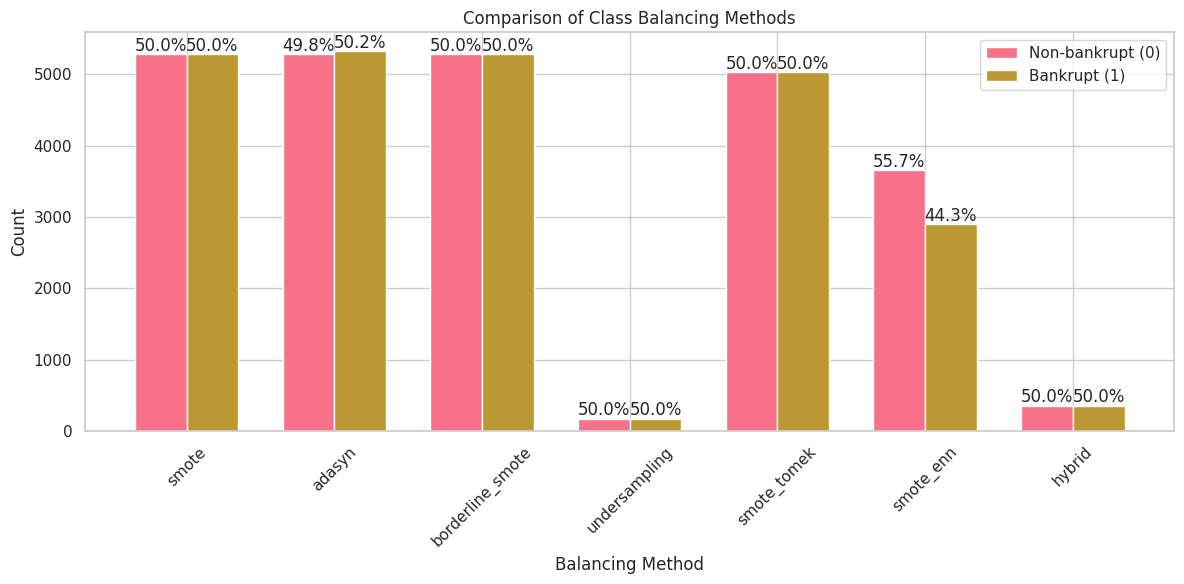

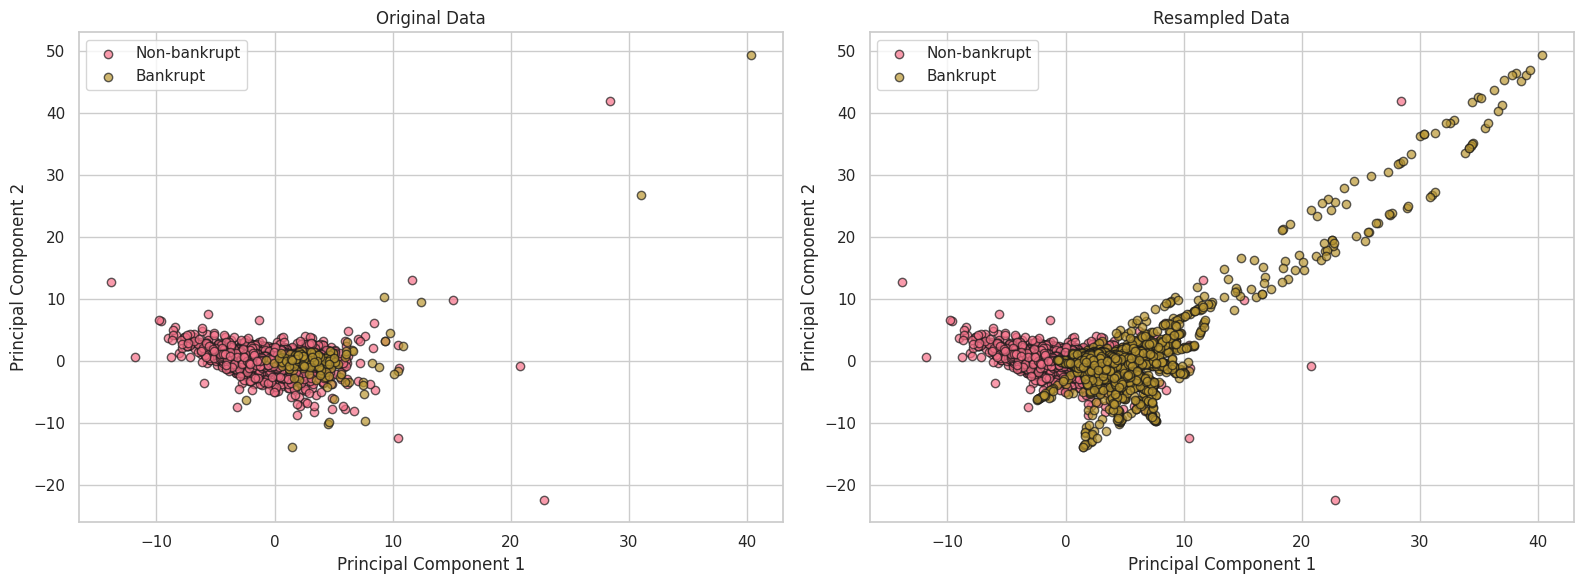

In [28]:
y = df['Bankrupt?']

# 1. Split the data
def split_data(X, y, test_size=0.2, stratify=True, random_state=42):
    """
    Split the data into training and testing sets

    Parameters:
    -----------
    X : pandas DataFrame
        Feature dataframe
    y : pandas Series
        Target variable
    test_size : float
        Proportion of data for testing
    stratify : bool
        Whether to stratify the split by target class
    random_state : int
        Random state for reproducibility

    Returns:
    --------
    tuple
        (X_train, X_test, y_train, y_test)
    """
    if stratify:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state, stratify=y
        )
    else:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )

    # Print class distribution in train and test sets
    print("Class distribution in training set:")
    print(pd.Series(y_train).value_counts(normalize=True).apply(lambda x: f"{x:.2%}"))

    print("\nClass distribution in test set:")
    print(pd.Series(y_test).value_counts(normalize=True).apply(lambda x: f"{x:.2%}"))

    # Return split data
    return X_train, X_test, y_train, y_test

# 2. Apply class balancing techniques
def balance_classes(X_train, y_train, method='smote', random_state=42):
    """
    Apply class balancing techniques to address class imbalance

    Parameters:
    -----------
    X_train : pandas DataFrame or numpy array
        Training features
    y_train : pandas Series or numpy array
        Training target variable
    method : str
        Balancing method to use:
        - 'smote': Synthetic Minority Over-sampling Technique
        - 'adasyn': Adaptive Synthetic Sampling
        - 'borderline_smote': Borderline SMOTE
        - 'undersampling': Random Under-sampling
        - 'smote_tomek': Combined SMOTE and Tomek links
        - 'smote_enn': Combined SMOTE and Edited Nearest Neighbors
        - 'hybrid': Combination of under-sampling majority and over-sampling minority
    random_state : int
        Random state for reproducibility

    Returns:
    --------
    tuple
        (X_resampled, y_resampled)
    """
    # Initial class distribution
    print("Original class distribution:")
    original_counter = Counter(y_train)
    print(f"Non-bankrupt (0): {original_counter[0]} ({original_counter[0]/len(y_train):.2%})")
    print(f"Bankrupt (1): {original_counter[1]} ({original_counter[1]/len(y_train):.2%})")
    print(f"Imbalance ratio: {original_counter[0]/original_counter[1]:.2f}:1")

    # Apply chosen method
    if method == 'smote':
        resampler = SMOTE(random_state=random_state)
        X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)

    elif method == 'adasyn':
        resampler = ADASYN(random_state=random_state)
        X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)

    elif method == 'borderline_smote':
        resampler = BorderlineSMOTE(random_state=random_state)
        X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)

    elif method == 'undersampling':
        resampler = RandomUnderSampler(random_state=random_state)
        X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)

    elif method == 'smote_tomek':
        resampler = SMOTETomek(random_state=random_state)
        X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)

    elif method == 'smote_enn':
        resampler = SMOTEENN(random_state=random_state)
        X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)

    elif method == 'hybrid':
        # First undersample the majority class
        undersampler = RandomUnderSampler(
            sampling_strategy=0.5,  # Reduce majority class to 2:1 ratio
            random_state=random_state
        )
        X_temp, y_temp = undersampler.fit_resample(X_train, y_train)

        # Then oversample the minority class to achieve balance
        oversampler = SMOTE(random_state=random_state)
        X_resampled, y_resampled = oversampler.fit_resample(X_temp, y_temp)

    else:
        raise ValueError(f"Unknown method: {method}")

    # Print new class distribution
    print("\nResampled class distribution:")
    resampled_counter = Counter(y_resampled)
    print(f"Non-bankrupt (0): {resampled_counter[0]} ({resampled_counter[0]/len(y_resampled):.2%})")
    print(f"Bankrupt (1): {resampled_counter[1]} ({resampled_counter[1]/len(y_resampled):.2%})")
    print(f"New ratio: {resampled_counter[0]/resampled_counter[1]:.2f}:1")

    return X_resampled, y_resampled

# 3. Visualize the data distribution before and after balancing
def visualize_balancing_effect(X_original, y_original, X_resampled, y_resampled):
    """
    Visualize the effect of class balancing using PCA

    Parameters:
    -----------
    X_original : pandas DataFrame or numpy array
        Original features
    y_original : pandas Series or numpy array
        Original target variable
    X_resampled : pandas DataFrame or numpy array
        Resampled features
    y_resampled : pandas Series or numpy array
        Resampled target variable
    """
    from sklearn.decomposition import PCA

    # Scale the data
    scaler = StandardScaler()
    X_original_scaled = scaler.fit_transform(X_original)
    X_resampled_scaled = scaler.transform(X_resampled)

    # Apply PCA for visualization
    pca = PCA(n_components=2)
    X_original_pca = pca.fit_transform(X_original_scaled)
    X_resampled_pca = pca.transform(X_resampled_scaled)

    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Plot original data
    for i, label in zip([0, 1], ['Non-bankrupt', 'Bankrupt']):
        mask = y_original == i
        ax1.scatter(
            X_original_pca[mask, 0],
            X_original_pca[mask, 1],
            label=label,
            alpha=0.7,
            edgecolors='k'
        )

    ax1.set_title('Original Data')
    ax1.set_xlabel('Principal Component 1')
    ax1.set_ylabel('Principal Component 2')
    ax1.legend()
    ax1.grid(True)

    # Plot resampled data
    for i, label in zip([0, 1], ['Non-bankrupt', 'Bankrupt']):
        mask = y_resampled == i
        ax2.scatter(
            X_resampled_pca[mask, 0],
            X_resampled_pca[mask, 1],
            label=label,
            alpha=0.7,
            edgecolors='k'
        )

    ax2.set_title('Resampled Data')
    ax2.set_xlabel('Principal Component 1')
    ax2.set_ylabel('Principal Component 2')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

# 4. Compare different balancing methods
def compare_balancing_methods(X_train, y_train):
    """
    Compare different balancing methods

    Parameters:
    -----------
    X_train : pandas DataFrame or numpy array
        Training features
    y_train : pandas Series or numpy array
        Training target variable

    Returns:
    --------
    dict
        Dictionary of resampled datasets for each method
    """
    methods = [
        'smote',
        'adasyn',
        'borderline_smote',
        'undersampling',
        'smote_tomek',
        'smote_enn',
        'hybrid'
    ]

    results = {}

    # Apply each method and store results
    for method in methods:
        print(f"\n--- Applying {method} ---")
        X_resampled, y_resampled = balance_classes(X_train, y_train, method=method)
        results[method] = {
            'X_resampled': X_resampled,
            'y_resampled': y_resampled,
            'count': Counter(y_resampled)
        }

    # Plot comparison
    plt.figure(figsize=(12, 6))

    # Create bars for each class
    x = np.arange(len(methods))
    width = 0.35

    # Get counts
    non_bankrupt_counts = [results[method]['count'][0] for method in methods]
    bankrupt_counts = [results[method]['count'][1] for method in methods]

    # Calculate percentages
    total_counts = [non_bankrupt_counts[i] + bankrupt_counts[i] for i in range(len(methods))]
    non_bankrupt_pcts = [non_bankrupt_counts[i] / total_counts[i] * 100 for i in range(len(methods))]
    bankrupt_pcts = [bankrupt_counts[i] / total_counts[i] * 100 for i in range(len(methods))]

    # Create bars
    plt.bar(x - width/2, non_bankrupt_counts, width, label='Non-bankrupt (0)')
    plt.bar(x + width/2, bankrupt_counts, width, label='Bankrupt (1)')

    # Add percentages on top of bars
    for i in range(len(methods)):
        plt.text(i - width/2, non_bankrupt_counts[i] + 50, f"{non_bankrupt_pcts[i]:.1f}%", ha='center')
        plt.text(i + width/2, bankrupt_counts[i] + 50, f"{bankrupt_pcts[i]:.1f}%", ha='center')

    # Add labels and legend
    plt.xlabel('Balancing Method')
    plt.ylabel('Count')
    plt.title('Comparison of Class Balancing Methods')
    plt.xticks(x, methods)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return results

# Execute pipeline
# 1. Split the data
X_train, X_test, y_train, y_test = split_data(X_reduced, y)

# 2. Compare different balancing methods
balancing_results = compare_balancing_methods(X_train, y_train)

# 3. Select the best method (you can choose based on your analysis)
selected_method = 'smote'  # Change this to your preferred method
X_train_balanced = balancing_results[selected_method]['X_resampled']
y_train_balanced = balancing_results[selected_method]['y_resampled']

# 4. Visualize the effect of the selected balancing method
visualize_balancing_effect(X_train, y_train, X_train_balanced, y_train_balanced)

# The balanced training data (X_train_balanced, y_train_balanced) is now ready for model training
# The test data (X_test, y_test) should remain imbalanced to reflect the real-world distribution

# Optional: Save the processed datasets
def save_processed_data(X_train_balanced, y_train_balanced, X_test, y_test, file_prefix='bankruptcy_'):
    """Save processed datasets to CSV files"""
    # Convert to DataFrames if needed
    if not isinstance(X_train_balanced, pd.DataFrame):
        X_train_balanced = pd.DataFrame(X_train_balanced, columns=X_reduced.columns)
    if not isinstance(y_train_balanced, pd.Series):
        y_train_balanced = pd.Series(y_train_balanced, name='Bankrupt?')
    if not isinstance(X_test, pd.DataFrame):
        X_test = pd.DataFrame(X_test, columns=X_reduced.columns)
    if not isinstance(y_test, pd.Series):
        y_test = pd.Series(y_test, name='Bankrupt?')

    # Create full datasets
    train_df = pd.concat([X_train_balanced, y_train_balanced], axis=1)
    test_df = pd.concat([X_test, y_test], axis=1)


In [44]:
######################## Models Evaluation with balance and imbalanced dataset   #################################

Class distribution in training set:
Non-bankrupt (0): 5279
Bankrupt (1): 176
Ratio: 29.994318181818183 :1

Class distribution in test set:
Non-bankrupt (0): 1320
Bankrupt (1): 44
Ratio: 30.0 :1

--- Training Logistic Regression on Original Imbalanced Data ---
Training time: 0.04 seconds
Accuracy: 0.9721
Precision (Bankruptcy): 0.7500
Recall (Bankruptcy): 0.2045
F1 Score: 0.3214
ROC AUC: 0.9343

Confusion Matrix:
[[1317    3]
 [  35    9]]

Classification Report:
              precision    recall  f1-score   support

Non-Bankrupt       0.97      1.00      0.99      1320
    Bankrupt       0.75      0.20      0.32        44

    accuracy                           0.97      1364
   macro avg       0.86      0.60      0.65      1364
weighted avg       0.97      0.97      0.96      1364


--- Training K-Nearest Neighbors on Original Imbalanced Data ---
Training time: 0.00 seconds
Accuracy: 0.9699
Precision (Bankruptcy): 0.6000
Recall (Bankruptcy): 0.2045
F1 Score: 0.3051
ROC AUC: 0.8067

Co

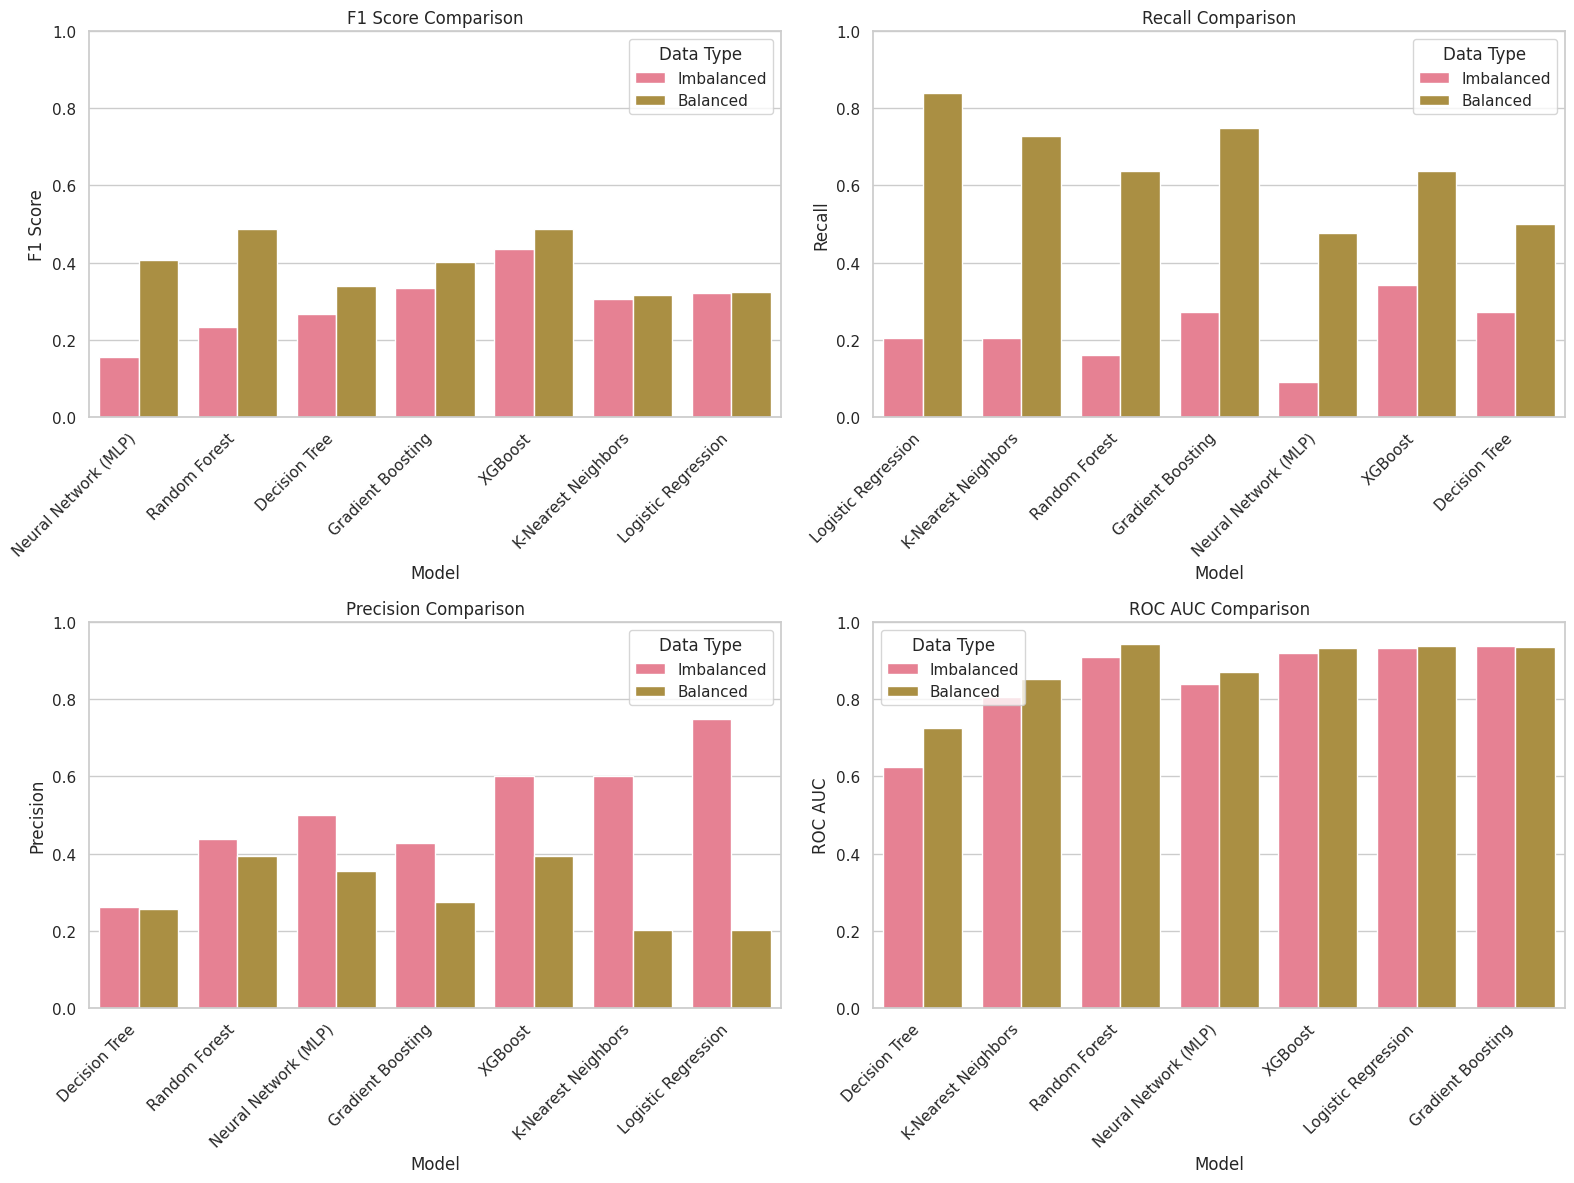

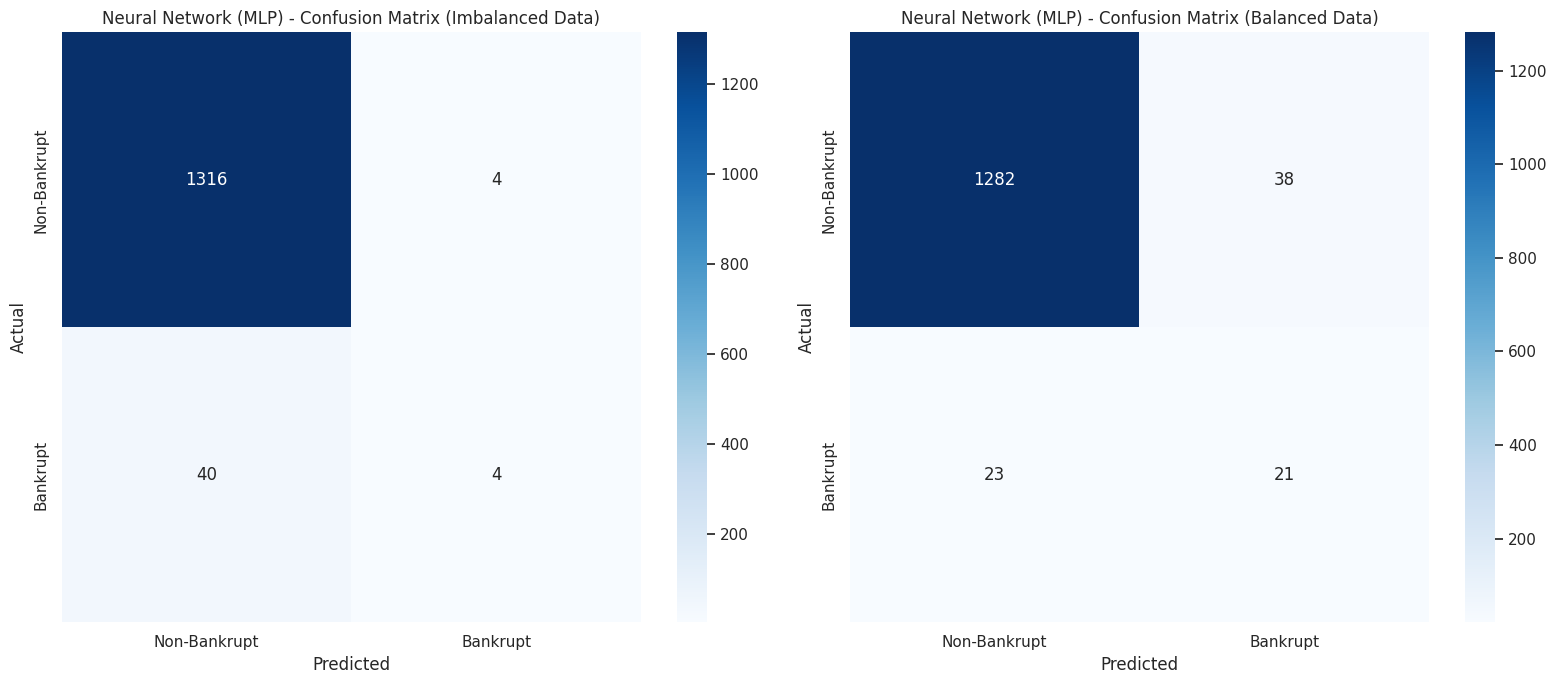

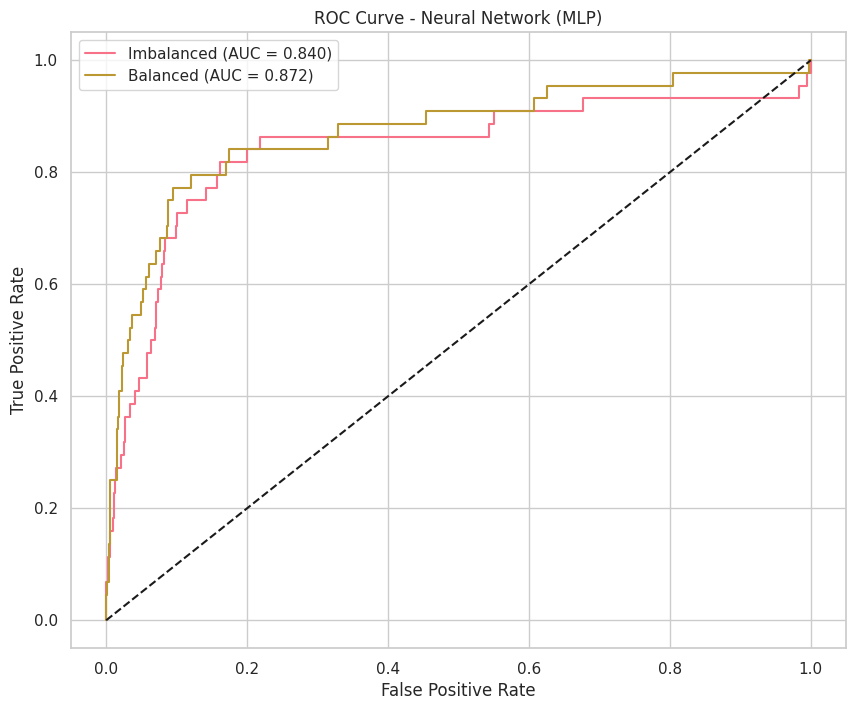

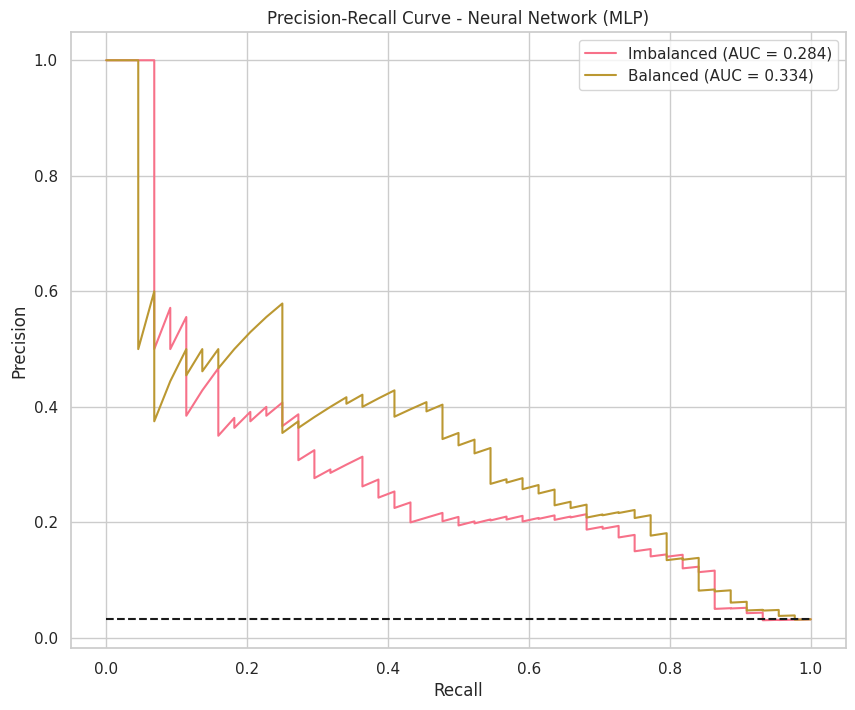


Type 2 Error Analysis (Missed Bankruptcies)
               Model  Type 2 Errors (Imbalanced)  Type 2 Error Rate (Imbalanced)  Type 2 Errors (Balanced)  Type 2 Error Rate (Balanced)  Type 2 Error Reduction (%)
 Logistic Regression                          35                        0.795455                         7                      0.159091                   80.000000
 K-Nearest Neighbors                          35                        0.795455                        12                      0.272727                   65.714286
   Gradient Boosting                          32                        0.727273                        11                      0.250000                   65.625000
       Random Forest                          37                        0.840909                        16                      0.363636                   56.756757
             XGBoost                          29                        0.659091                        16                      0.

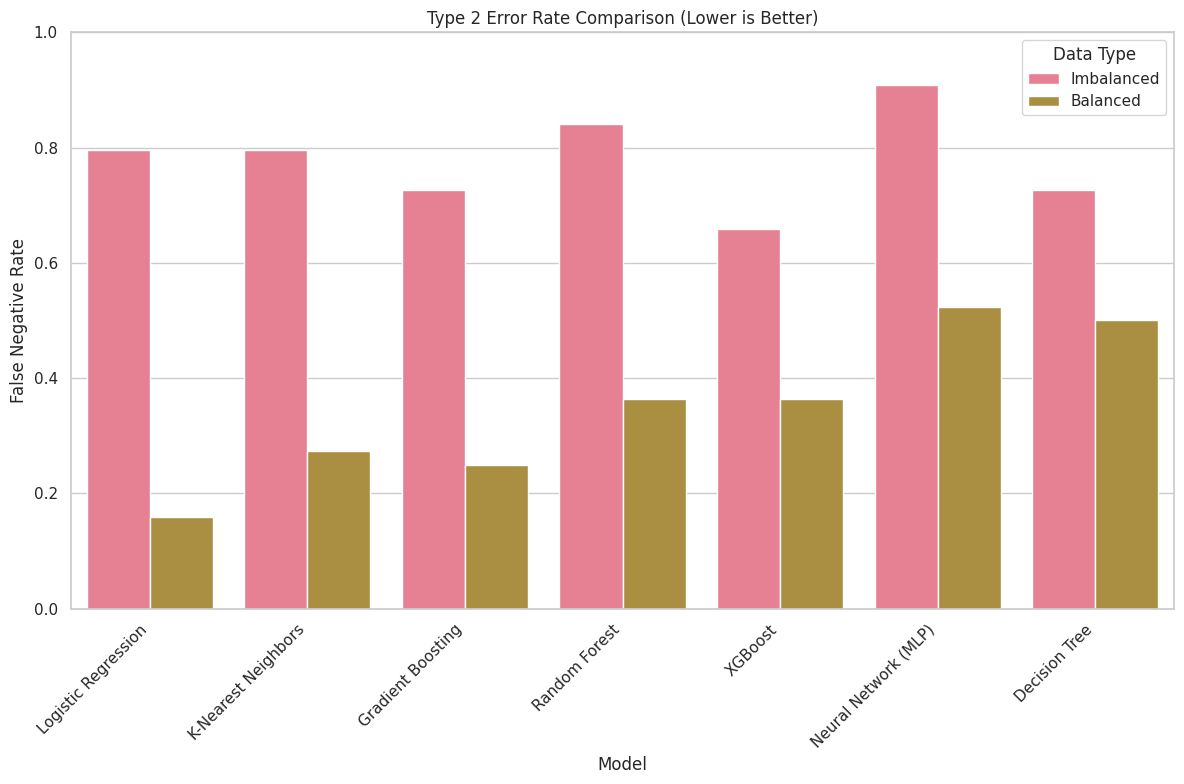

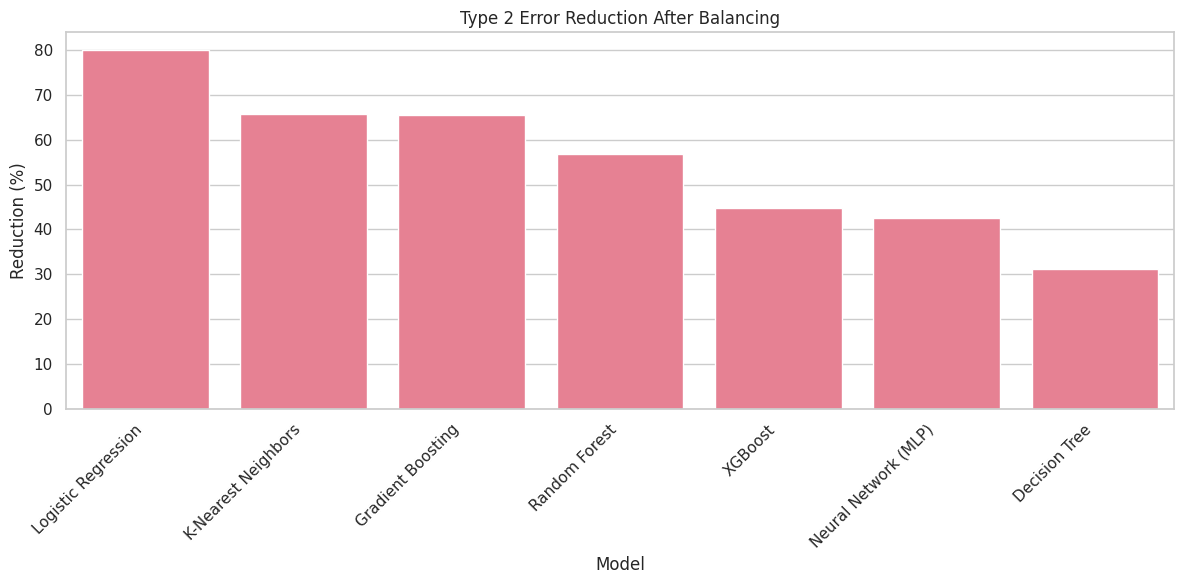

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    precision_recall_curve, roc_curve, auc
)
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# 1. Function to train and evaluate models on imbalanced data
def train_evaluate_imbalanced(X_train, y_train, X_test, y_test, scale_data=True):
    """
    Train and evaluate multiple classification models on imbalanced data

    Parameters:
    -----------
    X_train : pandas DataFrame or numpy array
        Training features
    y_train : pandas Series or numpy array
        Training target variable
    X_test : pandas DataFrame or numpy array
        Testing features
    y_test : pandas Series or numpy array
        Testing target variable
    scale_data : bool
        Whether to scale the data before training

    Returns:
    --------
    dict
        Dictionary with model results
    """
    # Scale the data if requested
    if scale_data:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test

    # Define the models
    models = {
        "Logistic Regression": LogisticRegression(
            max_iter=1000,
            random_state=42
        ),
        "K-Nearest Neighbors": KNeighborsClassifier(
            n_neighbors=5
        ),
        "Decision Tree": DecisionTreeClassifier(
            random_state=42
        ),
        "Random Forest": RandomForestClassifier(
            n_estimators=100,
            random_state=42
        ),
        "Gradient Boosting": GradientBoostingClassifier(
            n_estimators=100,
            random_state=42
        ),
        "XGBoost": xgb.XGBClassifier(
            n_estimators=100,
            random_state=42
        ),
        "Neural Network (MLP)": MLPClassifier(
            hidden_layer_sizes=(64, 32),
            max_iter=1000,
            early_stopping=True,
            random_state=42
        )
    }

    # Results dictionary
    results = {}

    # Train and evaluate each model
    for name, model in models.items():
        print(f"\n--- Training {name} on Original Imbalanced Data ---")

        # Start timer
        start_time = time()

        # Train the model
        model.fit(X_train_scaled, y_train)

        # Calculate training time
        train_time = time() - start_time

        # Make predictions
        y_pred = model.predict(X_test_scaled)

        # Get predicted probabilities if the model supports it
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        else:
            y_pred_proba = y_pred

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, pos_label=1)
        recall = recall_score(y_test, y_pred, pos_label=1)
        f1 = f1_score(y_test, y_pred, pos_label=1)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Store results
        results[name] = {
            'model': model,
            'predictions': y_pred,
            'probabilities': y_pred_proba,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': roc_auc,
            'confusion_matrix': cm,
            'training_time': train_time,
            'data_type': 'imbalanced'
        }

        # Print metrics
        print(f"Training time: {train_time:.2f} seconds")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision (Bankruptcy): {precision:.4f}")
        print(f"Recall (Bankruptcy): {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}")
        print("\nConfusion Matrix:")
        print(cm)
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=['Non-Bankrupt', 'Bankrupt']))

    return results

# 2. Function to train and evaluate models on balanced data
def train_evaluate_balanced(X_train, y_train, X_test, y_test, scale_data=True):
    """
    Train and evaluate multiple classification models on balanced data

    Parameters:
    -----------
    X_train : pandas DataFrame or numpy array
        Training features
    y_train : pandas Series or numpy array
        Training target variable
    X_test : pandas DataFrame or numpy array
        Testing features
    y_test : pandas Series or numpy array
        Testing target variable
    scale_data : bool
        Whether to scale the data before training

    Returns:
    --------
    dict
        Dictionary with model results
    """
    # Scale the data if requested
    if scale_data:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test

    # Apply SMOTE to balance the training data
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

    # Print class distribution after balancing
    print("\nClass distribution after SMOTE:")
    print("Non-bankrupt (0):", sum(y_train_balanced == 0))
    print("Bankrupt (1):", sum(y_train_balanced == 1))

    # Define the models (same models as before)
    models = {
        "Logistic Regression": LogisticRegression(
            max_iter=1000,
            random_state=42
        ),
        "K-Nearest Neighbors": KNeighborsClassifier(
            n_neighbors=5
        ),
        "Decision Tree": DecisionTreeClassifier(
            random_state=42
        ),
        "Random Forest": RandomForestClassifier(
            n_estimators=100,
            random_state=42
        ),
        "Gradient Boosting": GradientBoostingClassifier(
            n_estimators=100,
            random_state=42
        ),
        "XGBoost": xgb.XGBClassifier(
            n_estimators=100,
            random_state=42
        ),
        "Neural Network (MLP)": MLPClassifier(
            hidden_layer_sizes=(64, 32),
            max_iter=1000,
            early_stopping=True,
            random_state=42
        )
    }

    # Results dictionary
    results = {}

    # Train and evaluate each model
    for name, model in models.items():
        print(f"\n--- Training {name} on Balanced Data ---")

        # Start timer
        start_time = time()

        # Train the model on balanced data
        model.fit(X_train_balanced, y_train_balanced)

        # Calculate training time
        train_time = time() - start_time

        # Make predictions on the original test set (important!)
        y_pred = model.predict(X_test_scaled)

        # Get predicted probabilities if the model supports it
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        else:
            y_pred_proba = y_pred

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, pos_label=1)
        recall = recall_score(y_test, y_pred, pos_label=1)
        f1 = f1_score(y_test, y_pred, pos_label=1)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Store results
        results[name] = {
            'model': model,
            'predictions': y_pred,
            'probabilities': y_pred_proba,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': roc_auc,
            'confusion_matrix': cm,
            'training_time': train_time,
            'data_type': 'balanced'
        }

        # Print metrics
        print(f"Training time: {train_time:.2f} seconds")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision (Bankruptcy): {precision:.4f}")
        print(f"Recall (Bankruptcy): {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}")
        print("\nConfusion Matrix:")
        print(cm)
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=['Non-Bankrupt', 'Bankrupt']))

    return results

# 3. Function to compare model performance before and after balancing
def compare_balancing_impact(imbalanced_results, balanced_results):
    """
    Compare model performance before and after applying class balancing

    Parameters:
    -----------
    imbalanced_results : dict
        Results from models trained on imbalanced data
    balanced_results : dict
        Results from models trained on balanced data
    """
    # Create comparison DataFrames
    model_names = list(imbalanced_results.keys())

    # Initialize lists for metrics
    models = []
    accuracy_imb = []
    precision_imb = []
    recall_imb = []
    f1_imb = []
    roc_auc_imb = []

    accuracy_bal = []
    precision_bal = []
    recall_bal = []
    f1_bal = []
    roc_auc_bal = []

    # Get metrics for each model
    for name in model_names:
        models.append(name)

        # Get metrics for imbalanced data
        imb = imbalanced_results[name]
        accuracy_imb.append(imb['accuracy'])
        precision_imb.append(imb['precision'])
        recall_imb.append(imb['recall'])
        f1_imb.append(imb['f1_score'])
        roc_auc_imb.append(imb['roc_auc'])

        # Get metrics for balanced data
        bal = balanced_results[name]
        accuracy_bal.append(bal['accuracy'])
        precision_bal.append(bal['precision'])
        recall_bal.append(bal['recall'])
        f1_bal.append(bal['f1_score'])
        roc_auc_bal.append(bal['roc_auc'])

    # Create DataFrame
    comparison_df = pd.DataFrame({
        'Model': models,
        'Accuracy (Imbalanced)': accuracy_imb,
        'Accuracy (Balanced)': accuracy_bal,
        'Accuracy (Diff)': np.array(accuracy_bal) - np.array(accuracy_imb),
        'Precision (Imbalanced)': precision_imb,
        'Precision (Balanced)': precision_bal,
        'Precision (Diff)': np.array(precision_bal) - np.array(precision_imb),
        'Recall (Imbalanced)': recall_imb,
        'Recall (Balanced)': recall_bal,
        'Recall (Diff)': np.array(recall_bal) - np.array(recall_imb),
        'F1 Score (Imbalanced)': f1_imb,
        'F1 Score (Balanced)': f1_bal,
        'F1 Score (Diff)': np.array(f1_bal) - np.array(f1_imb),
        'ROC AUC (Imbalanced)': roc_auc_imb,
        'ROC AUC (Balanced)': roc_auc_bal,
        'ROC AUC (Diff)': np.array(roc_auc_bal) - np.array(roc_auc_imb)
    })

    # Sort by F1 Score improvement
    comparison_df = comparison_df.sort_values('F1 Score (Diff)', ascending=False)

    # Print comparison table
    print("\nModel Performance Comparison: Imbalanced vs. Balanced Training Data")

    # Print key metrics
    print("\nF1 Score Comparison (Bankrupt Class):")
    print(comparison_df[['Model', 'F1 Score (Imbalanced)', 'F1 Score (Balanced)', 'F1 Score (Diff)']].to_string(index=False))

    print("\nRecall Comparison (Bankrupt Class):")
    print(comparison_df[['Model', 'Recall (Imbalanced)', 'Recall (Balanced)', 'Recall (Diff)']].to_string(index=False))

    print("\nPrecision Comparison (Bankrupt Class):")
    print(comparison_df[['Model', 'Precision (Imbalanced)', 'Precision (Balanced)', 'Precision (Diff)']].to_string(index=False))

    # Plot comparison
    metrics_to_plot = [
        ('F1 Score', 'F1 Score (Imbalanced)', 'F1 Score (Balanced)'),
        ('Recall', 'Recall (Imbalanced)', 'Recall (Balanced)'),
        ('Precision', 'Precision (Imbalanced)', 'Precision (Balanced)'),
        ('ROC AUC', 'ROC AUC (Imbalanced)', 'ROC AUC (Balanced)')
    ]

    # Set up the figure
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()

    # Plot each metric
    for i, (metric, imb_col, bal_col) in enumerate(metrics_to_plot):
        # Create DataFrame for this metric, sorted by improvement
        metric_df = comparison_df.sort_values(f'{metric} (Diff)', ascending=False)[['Model', imb_col, bal_col]]

        # Reshape for easier plotting
        plot_df = pd.melt(metric_df, id_vars=['Model'], value_vars=[imb_col, bal_col],
                        var_name='Data Type', value_name=metric)

        # Replace long column names with simpler ones for legend
        plot_df['Data Type'] = plot_df['Data Type'].map({
            imb_col: 'Imbalanced',
            bal_col: 'Balanced'
        })

        # Plot
        sns.barplot(x='Model', y=metric, hue='Data Type', data=plot_df, ax=axes[i])
        axes[i].set_title(f'{metric} Comparison')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
        axes[i].set_ylim(0, 1)

    plt.tight_layout()
    plt.show()

    # Plot confusion matrices for a select model (best improved F1 score)
    best_model = comparison_df.iloc[0]['Model']

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

    # Imbalanced confusion matrix
    cm_imb = imbalanced_results[best_model]['confusion_matrix']
    sns.heatmap(cm_imb, annot=True, fmt='d', cmap='Blues',
               xticklabels=['Non-Bankrupt', 'Bankrupt'],
               yticklabels=['Non-Bankrupt', 'Bankrupt'],
               ax=ax1)
    ax1.set_title(f'{best_model} - Confusion Matrix (Imbalanced Data)')
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('Actual')

    # Balanced confusion matrix
    cm_bal = balanced_results[best_model]['confusion_matrix']
    sns.heatmap(cm_bal, annot=True, fmt='d', cmap='Blues',
               xticklabels=['Non-Bankrupt', 'Bankrupt'],
               yticklabels=['Non-Bankrupt', 'Bankrupt'],
               ax=ax2)
    ax2.set_title(f'{best_model} - Confusion Matrix (Balanced Data)')
    ax2.set_xlabel('Predicted')
    ax2.set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

    # Plot ROC curves for the best model
    plt.figure(figsize=(10, 8))

    # Get the data for the best model
    imb_probs = imbalanced_results[best_model]['probabilities']
    bal_probs = balanced_results[best_model]['probabilities']

    # Calculate ROC curves
    fpr_imb, tpr_imb, _ = roc_curve(y_test, imb_probs)
    fpr_bal, tpr_bal, _ = roc_curve(y_test, bal_probs)

    # Plot ROC curves
    plt.plot(fpr_imb, tpr_imb, label=f'Imbalanced (AUC = {imbalanced_results[best_model]["roc_auc"]:.3f})')
    plt.plot(fpr_bal, tpr_bal, label=f'Balanced (AUC = {balanced_results[best_model]["roc_auc"]:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {best_model}')
    plt.legend()
    plt.show()

    # Plot Precision-Recall curves for the best model
    plt.figure(figsize=(10, 8))

    # Calculate PR curves
    precision_imb, recall_imb, _ = precision_recall_curve(y_test, imb_probs)
    precision_bal, recall_bal, _ = precision_recall_curve(y_test, bal_probs)

    # Calculate PR AUC
    pr_auc_imb = auc(recall_imb, precision_imb)
    pr_auc_bal = auc(recall_bal, precision_bal)

    # Plot PR curves
    plt.plot(recall_imb, precision_imb, label=f'Imbalanced (AUC = {pr_auc_imb:.3f})')
    plt.plot(recall_bal, precision_bal, label=f'Balanced (AUC = {pr_auc_bal:.3f})')

    # Plot no-skill line (baseline)
    no_skill = sum(y_test == 1) / len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], 'k--')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {best_model}')
    plt.legend()
    plt.show()

    return comparison_df

# Main execution code
# Assuming you have X_train, y_train, X_test, y_test from your previous data splitting step

# 1. Print class distribution in training and test sets
print("Class distribution in training set:")
print("Non-bankrupt (0):", sum(y_train == 0))
print("Bankrupt (1):", sum(y_train == 1))
print("Ratio:", sum(y_train == 0) / sum(y_train == 1), ":1")

print("\nClass distribution in test set:")
print("Non-bankrupt (0):", sum(y_test == 0))
print("Bankrupt (1):", sum(y_test == 1))
print("Ratio:", sum(y_test == 0) / sum(y_test == 1), ":1")

# 2. Train and evaluate models on imbalanced data
imbalanced_results = train_evaluate_imbalanced(X_train, y_train, X_test, y_test)

# 3. Train and evaluate models on balanced data
balanced_results = train_evaluate_balanced(X_train, y_train, X_test, y_test)

# 4. Compare the results
comparison_df = compare_balancing_impact(imbalanced_results, balanced_results)

# 5. Analyze Type 2 errors specifically
def analyze_type2_errors(imbalanced_results, balanced_results, y_test):
    """
    Analyze Type 2 errors (missed bankruptcies) before and after balancing

    Parameters:
    -----------
    imbalanced_results : dict
        Results from models trained on imbalanced data
    balanced_results : dict
        Results from models trained on balanced data
    y_test : array-like
        True test labels
    """
    # Create results table
    model_names = list(imbalanced_results.keys())

    # Initialize lists
    models = []
    type2_errors_imb = []
    type2_error_rate_imb = []
    type2_errors_bal = []
    type2_error_rate_bal = []
    type2_reduction = []

    # Calculate Type 2 errors for each model
    for name in model_names:
        models.append(name)

        # Calculate Type 2 errors for imbalanced model
        y_pred_imb = imbalanced_results[name]['predictions']
        cm_imb = confusion_matrix(y_test, y_pred_imb)
        fn_imb = cm_imb[1, 0]  # False negatives (missed bankruptcies)
        type2_errors_imb.append(fn_imb)

        # Calculate Type 2 error rate (false negative rate)
        actual_positives = sum(y_test == 1)
        type2_error_rate_imb.append(fn_imb / actual_positives if actual_positives > 0 else 0)

        # Calculate Type 2 errors for balanced model
        y_pred_bal = balanced_results[name]['predictions']
        cm_bal = confusion_matrix(y_test, y_pred_bal)
        fn_bal = cm_bal[1, 0]  # False negatives (missed bankruptcies)
        type2_errors_bal.append(fn_bal)

        # Calculate Type 2 error rate (false negative rate)
        type2_error_rate_bal.append(fn_bal / actual_positives if actual_positives > 0 else 0)

        # Calculate reduction in Type 2 errors
        type2_reduction.append((fn_imb - fn_bal) / fn_imb * 100 if fn_imb > 0 else 0)

    # Create DataFrame
    type2_df = pd.DataFrame({
        'Model': models,
        'Type 2 Errors (Imbalanced)': type2_errors_imb,
        'Type 2 Error Rate (Imbalanced)': type2_error_rate_imb,
        'Type 2 Errors (Balanced)': type2_errors_bal,
        'Type 2 Error Rate (Balanced)': type2_error_rate_bal,
        'Type 2 Error Reduction (%)': type2_reduction
    })

    # Sort by Type 2 error reduction
    type2_df = type2_df.sort_values('Type 2 Error Reduction (%)', ascending=False)

    # Print results
    print("\nType 2 Error Analysis (Missed Bankruptcies)")
    print(type2_df.to_string(index=False))

    # Plot Type 2 error rates before and after balancing
    plt.figure(figsize=(12, 8))

    # Create DataFrame for plotting
    plot_df = pd.melt(type2_df, id_vars=['Model'],
                     value_vars=['Type 2 Error Rate (Imbalanced)', 'Type 2 Error Rate (Balanced)'],
                     var_name='Data Type', value_name='Type 2 Error Rate')

    # Replace long column names with simpler ones for legend
    plot_df['Data Type'] = plot_df['Data Type'].map({
        'Type 2 Error Rate (Imbalanced)': 'Imbalanced',
        'Type 2 Error Rate (Balanced)': 'Balanced'
    })

    # Create plot
    sns.barplot(x='Model', y='Type 2 Error Rate', hue='Data Type', data=plot_df)
    plt.title('Type 2 Error Rate Comparison (Lower is Better)')
    plt.xlabel('Model')
    plt.ylabel('False Negative Rate')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

    # Plot Type 2 error reduction percentages
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='Type 2 Error Reduction (%)', data=type2_df)
    plt.title('Type 2 Error Reduction After Balancing')
    plt.xlabel('Model')
    plt.ylabel('Reduction (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    return type2_df

# Analyze Type 2 errors
type2_analysis = analyze_type2_errors(imbalanced_results, balanced_results, y_test)

# 6. Find the best model for bankruptcy prediction
def find_best_model(imbalanced_results, balanced_results, y_test, focus='recall'):
    """
    Find the best model for bankruptcy prediction

    Parameters:
    -----------
    imbalanced_results : dict
        Results from models trained on imbalanced data
    balanced_results : dict
        Results from models trained on balanced data
    y_test : array-like
        True test labels
    focus : str
        Which metric to focus on: 'recall', 'precision', 'f1', or 'pr_auc'

    Returns:
    --------
    tuple
        (best_model_name, best_model, best_proba, best_threshold, best_approach)
    """
    # Create results table
    model_names = list(imbalanced_results.keys())

    # Initialize variables for best model
    best_score = 0
    best_model_name = None
    best_model = None
    best_proba = None
    best_threshold = 0.5
    best_approach = None

    # Find the best model
    for name in model_names:
        # Check imbalanced model
        if hasattr(imbalanced_results[name]['model'], 'predict_proba'):
            imb_proba = imbalanced_results[name]['probabilities']

            if focus == 'recall':
                # For each possible threshold, find the one that maximizes recall
                for threshold in np.arange(0.1, 0.9, 0.01):
                    y_pred = (imb_proba >= threshold).astype(int)
                    recall = recall_score(y_test, y_pred, pos_label=1)

                    if recall > best_score:
                        best_score = recall
                        best_model_name = name
                        best_model = imbalanced_results[name]['model']
                        best_proba = imb_proba
                        best_threshold = threshold
                        best_approach = 'imbalanced'

            elif focus == 'precision':
                # For each possible threshold, find the one that maximizes precision
                for threshold in np.arange(0.1, 0.9, 0.01):
                    y_pred = (imb_proba >= threshold).astype(int)
                    precision = precision_score(y_test, y_pred, pos_label=1)

                    if precision > best_score:
                        best_score = precision
                        best_model_name = name
                        best_model = imbalanced_results[name]['model']
                        best_proba = imb_proba
                        best_threshold = threshold
                        best_approach = 'imbalanced'

            elif focus == 'f1':
                # For each possible threshold, find the one that maximizes F1
                for threshold in np.arange(0.1, 0.9, 0.01):
                    y_pred = (imb_proba >= threshold).astype(int)
                    f1 = f1_score(y_test, y_pred, pos_label=1)

                    if f1 > best_score:
                        best_score = f1
                        best_model_name = name
                        best_model = imbalanced_results[name]['model']
                        best_proba = imb_proba
                        best_threshold = threshold
                        best_approach = 'imbalanced'

            elif focus == 'pr_auc':
                # Calculate PR AUC
                precision, recall, _ = precision_recall_curve(y_test, imb_proba)
                pr_auc = auc(recall, precision)

                if pr_auc > best_score:
                    best_score = pr_auc
                    best_model_name = name
                    best_model = imbalanced_results[name]['model']
                    best_proba = imb_proba
                    best_threshold = 0.5  # Default threshold for PR AUC
                    best_approach = 'imbalanced'

        # Check balanced model
        if hasattr(balanced_results[name]['model'], 'predict_proba'):
            bal_proba = balanced_results[name]['probabilities']

            if focus == 'recall':
                # For each possible threshold, find the one that maximizes recall
                for threshold in np.arange(0.1, 0.9, 0.01):
                    y_pred = (bal_proba >= threshold).astype(int)
                    recall = recall_score(y_test, y_pred, pos_label=1)

In [45]:
#############################33 Model evaluation with balanced data


--- Training Logistic Regression ---
Training time: 0.09 seconds
Accuracy: 0.8915
Precision (Bankruptcy): 0.2079
Recall (Bankruptcy): 0.8409
F1 Score: 0.3333
ROC AUC: 0.9382

Confusion Matrix:
[[1179  141]
 [   7   37]]

Classification Report:
              precision    recall  f1-score   support

Non-Bankrupt       0.99      0.89      0.94      1320
    Bankrupt       0.21      0.84      0.33        44

    accuracy                           0.89      1364
   macro avg       0.60      0.87      0.64      1364
weighted avg       0.97      0.89      0.92      1364


--- Training K-Nearest Neighbors ---
Training time: 0.01 seconds
Accuracy: 0.9069
Precision (Bankruptcy): 0.2288
Recall (Bankruptcy): 0.7955
F1 Score: 0.3553
ROC AUC: 0.8831

Confusion Matrix:
[[1202  118]
 [   9   35]]

Classification Report:
              precision    recall  f1-score   support

Non-Bankrupt       0.99      0.91      0.95      1320
    Bankrupt       0.23      0.80      0.36        44

    accuracy       

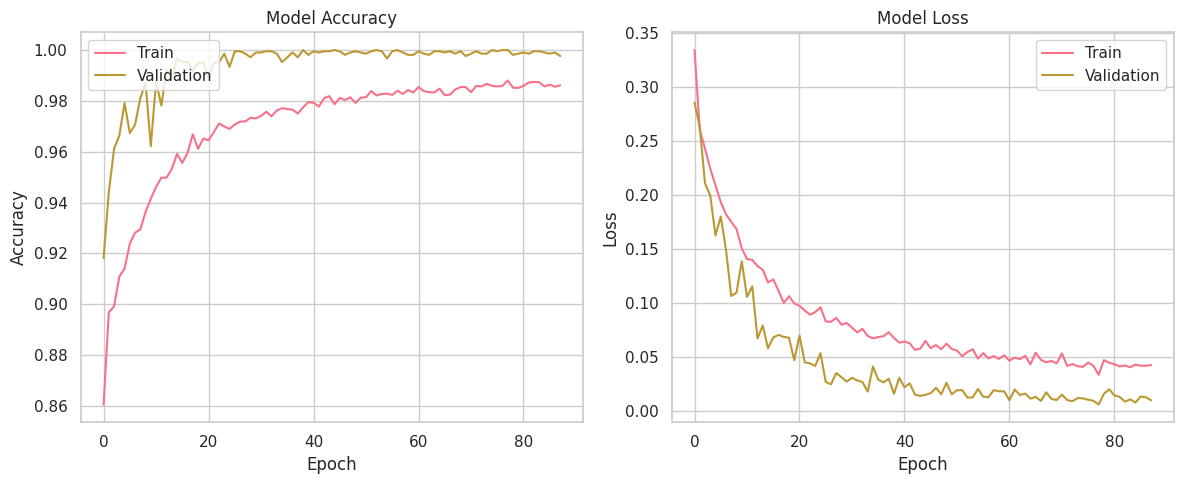

Model Performance Comparison:
               Model  Accuracy  Precision   Recall  F1 Score  ROC AUC  Training Time (s)
       Random Forest  0.954545   0.381579 0.659091  0.483333 0.936829           4.873196
 Deep Neural Network  0.962610   0.433962 0.522727  0.474227 0.914885         117.218888
             XGBoost  0.946481   0.333333 0.659091  0.442748 0.934143           2.340996
Neural Network (MLP)  0.954545   0.354839 0.500000  0.415094 0.887276           5.731856
   Gradient Boosting  0.922287   0.261538 0.772727  0.390805 0.934246          14.746570
 K-Nearest Neighbors  0.906891   0.228758 0.795455  0.355330 0.883058           0.005730
 Logistic Regression  0.891496   0.207865 0.840909  0.333333 0.938223           0.086792
       Decision Tree  0.928886   0.208791 0.431818  0.281481 0.688636           0.629594


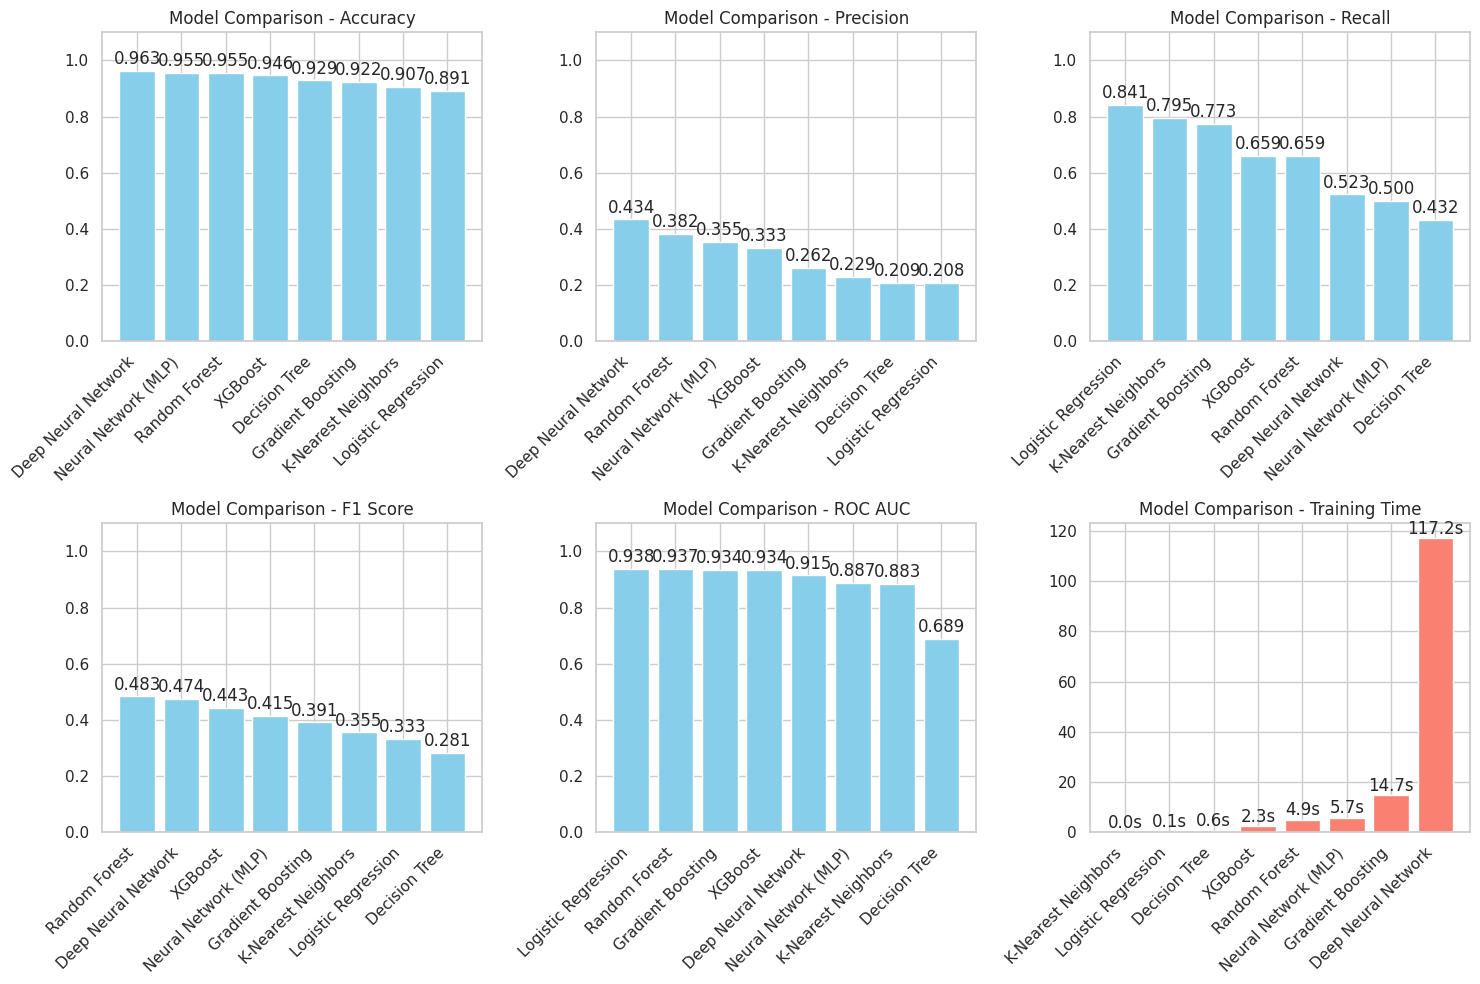

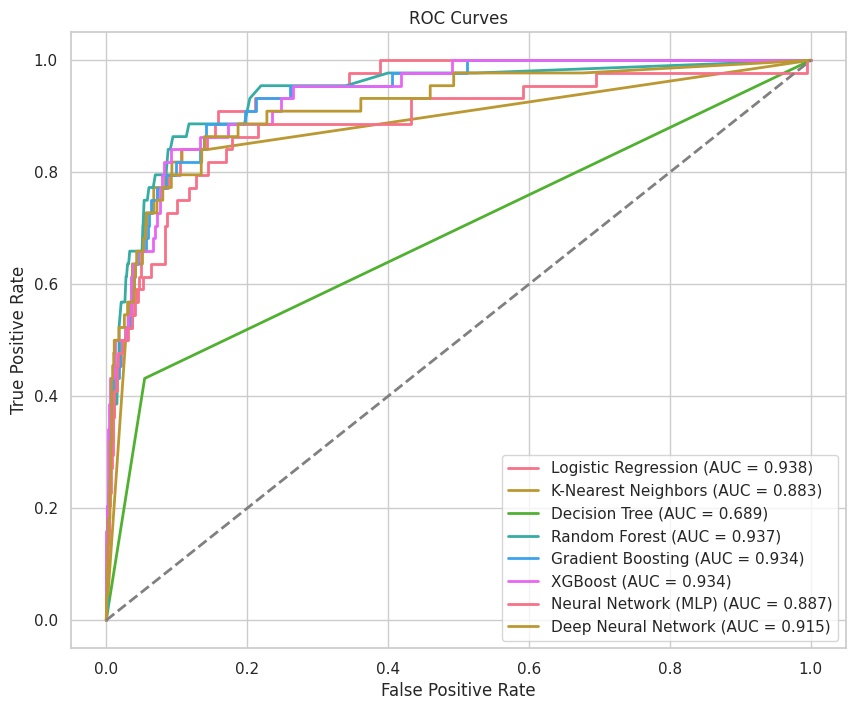

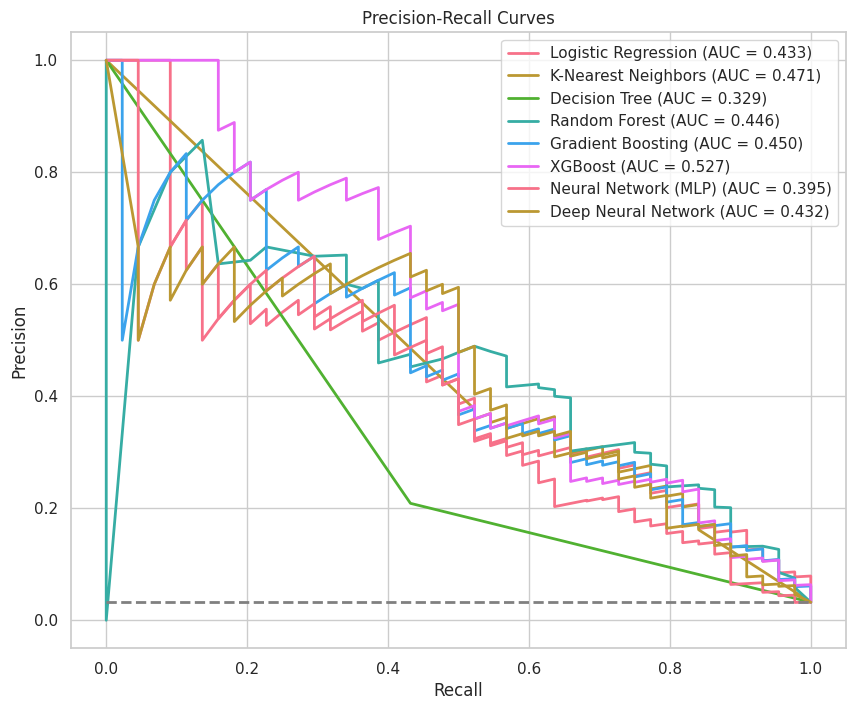

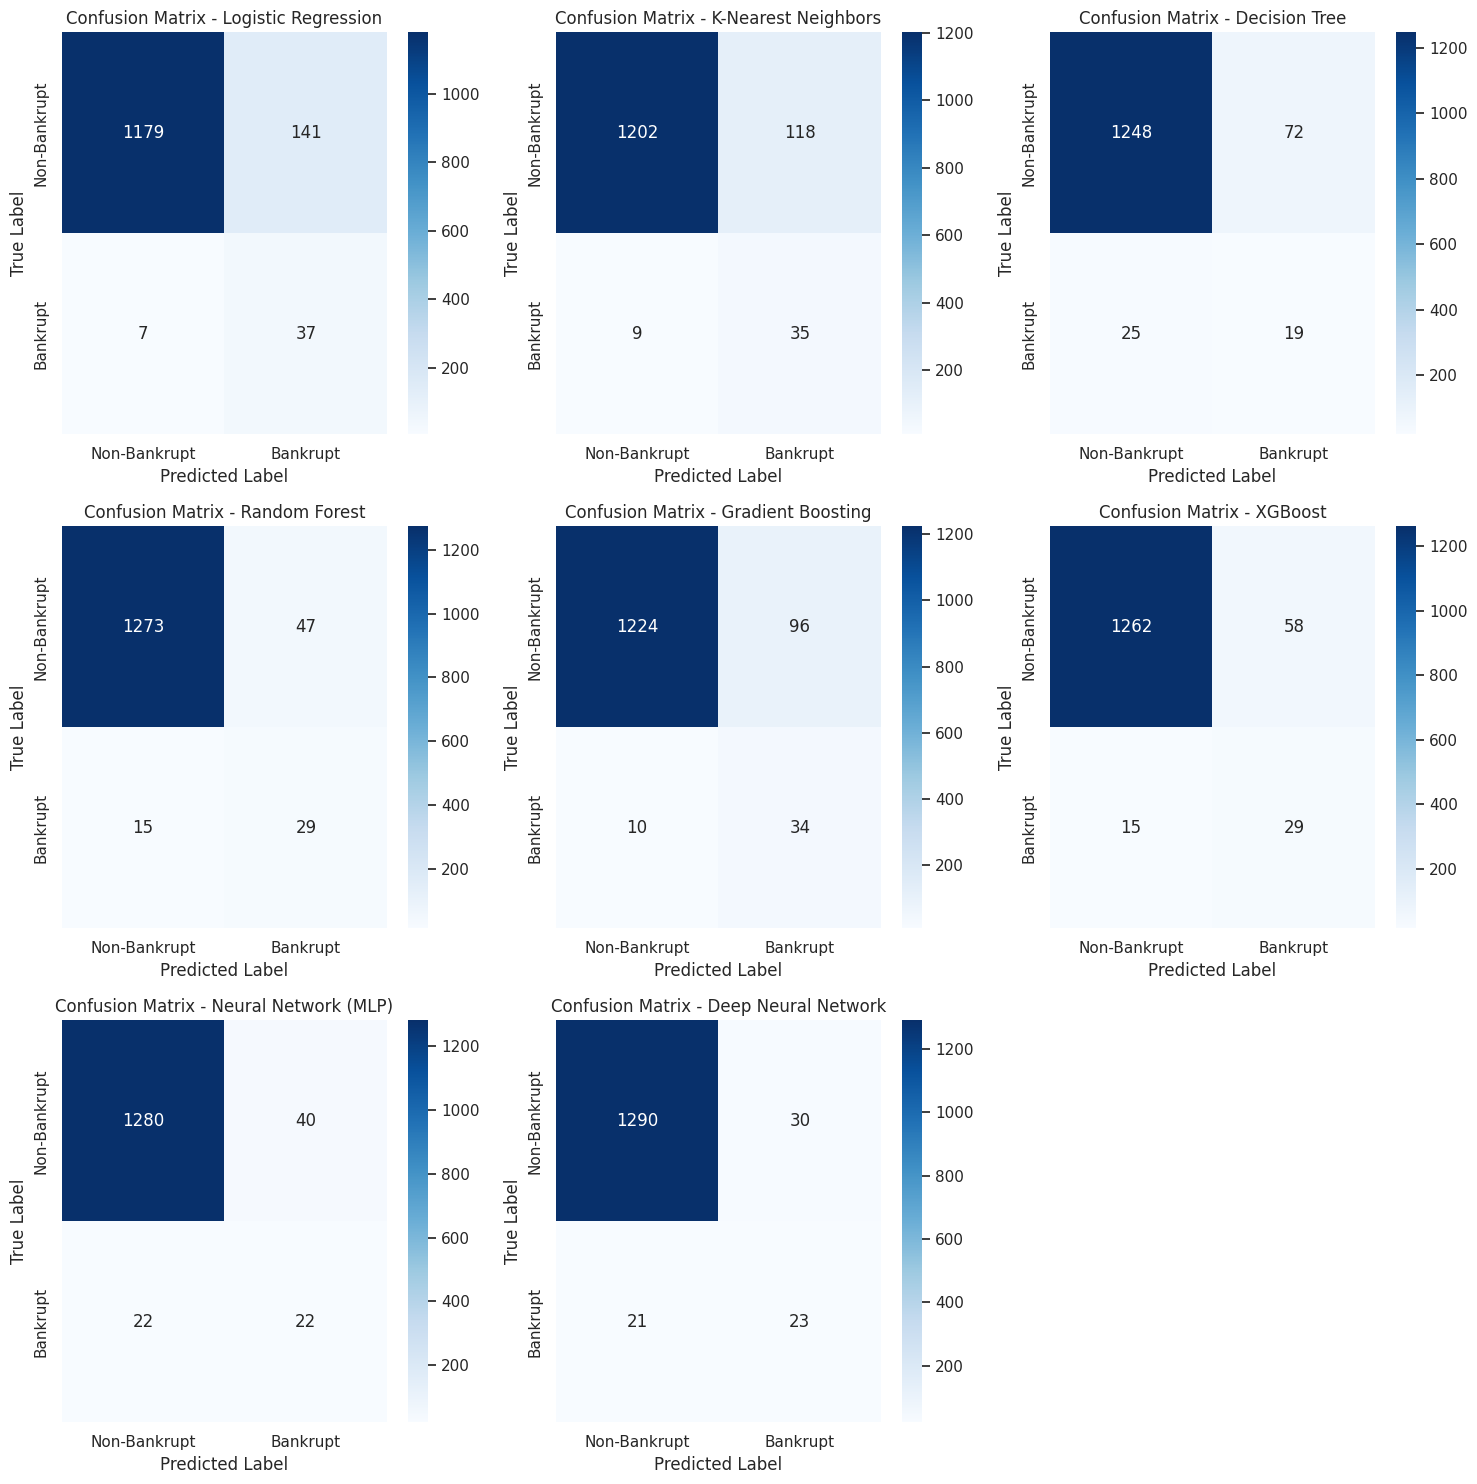


Best Model: Random Forest
F1 Score: 0.4833
Precision: 0.3816
Recall: 0.6591
ROC AUC: 0.9368


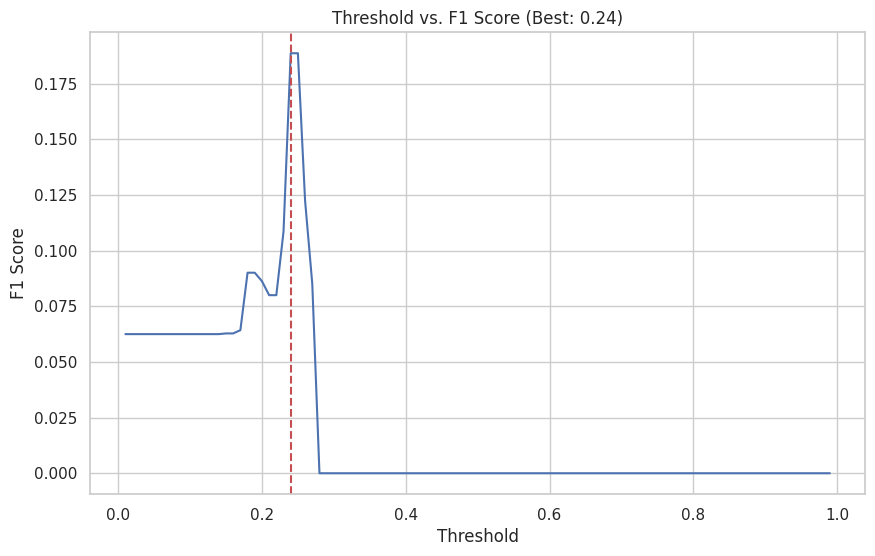

Optimal threshold for f1: 0.2400
Best f1 score: 0.1887


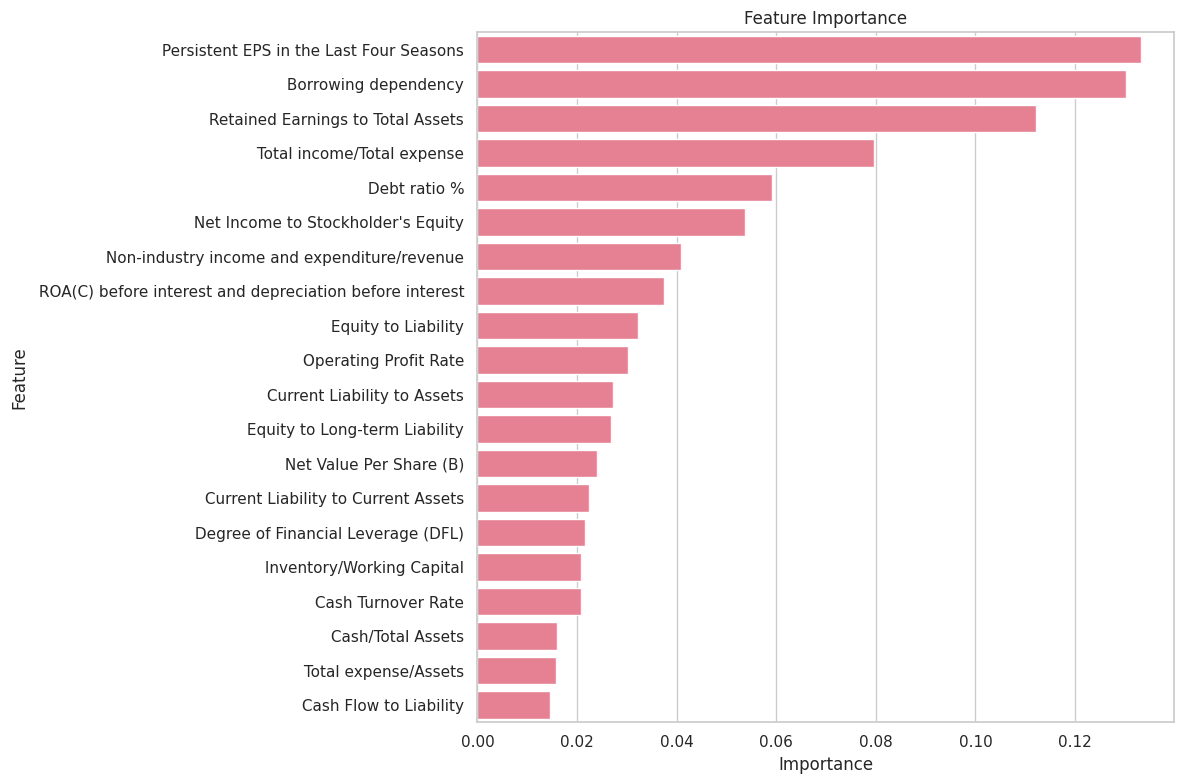

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    precision_recall_curve, roc_curve, auc
)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Assuming you have:
# X_train_balanced, y_train_balanced from the balancing step
# X_test, y_test from the initial train-test split

# 1. Define a function to build, train and evaluate models
def train_evaluate_models(X_train, y_train, X_test, y_test, scale_data=True, verbose=True):
    """
    Train and evaluate multiple classification models

    Parameters:
    -----------
    X_train : pandas DataFrame or numpy array
        Training features
    y_train : pandas Series or numpy array
        Training target variable
    X_test : pandas DataFrame or numpy array
        Testing features
    y_test : pandas Series or numpy array
        Testing target variable
    scale_data : bool
        Whether to scale the data before training
    verbose : bool
        Whether to print intermediate results

    Returns:
    --------
    dict
        Dictionary with model results
    """
    # Scale the data if requested
    if scale_data:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test

    # Define the models
    models = {
        "Logistic Regression": LogisticRegression(
            max_iter=1000,
            class_weight='balanced',
            random_state=42
        ),
        "K-Nearest Neighbors": KNeighborsClassifier(
            n_neighbors=5,
            weights='distance'
        ),
        "Decision Tree": DecisionTreeClassifier(
            class_weight='balanced',
            random_state=42
        ),
        "Random Forest": RandomForestClassifier(
            n_estimators=100,
            class_weight='balanced',
            random_state=42,
            n_jobs=-1
        ),
        "Gradient Boosting": GradientBoostingClassifier(
            n_estimators=100,
            random_state=42
        ),
        "XGBoost": xgb.XGBClassifier(
            n_estimators=100,
            learning_rate=0.1,
            scale_pos_weight=sum(y_train == 0) / sum(y_train == 1),
            random_state=42
        ),
        "Neural Network (MLP)": MLPClassifier(
            hidden_layer_sizes=(64, 32),
            max_iter=1000,
            early_stopping=True,
            random_state=42
        )
    }

    # Results dictionary
    results = {}

    # Train and evaluate each model
    for name, model in models.items():
        if verbose:
            print(f"\n--- Training {name} ---")

        # Start timer
        start_time = time()

        # Train the model
        model.fit(X_train_scaled, y_train)

        # Calculate training time
        train_time = time() - start_time

        # Make predictions
        y_pred = model.predict(X_test_scaled)

        # Get predicted probabilities if the model supports it
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        else:
            # For models that don't have predict_proba
            y_pred_proba = y_pred

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, pos_label=1)
        recall = recall_score(y_test, y_pred, pos_label=1)
        f1 = f1_score(y_test, y_pred, pos_label=1)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Store results
        results[name] = {
            'model': model,
            'predictions': y_pred,
            'probabilities': y_pred_proba,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': roc_auc,
            'confusion_matrix': cm,
            'training_time': train_time
        }

        # Print results if verbose
        if verbose:
            print(f"Training time: {train_time:.2f} seconds")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"Precision (Bankruptcy): {precision:.4f}")
            print(f"Recall (Bankruptcy): {recall:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(f"ROC AUC: {roc_auc:.4f}")
            print("\nConfusion Matrix:")
            print(cm)
            print("\nClassification Report:")
            print(classification_report(y_test, y_pred, target_names=['Non-Bankrupt', 'Bankrupt']))

    return results

# 2. Function to build and train a deep neural network
def train_deep_neural_network(X_train, y_train, X_test, y_test, scale_data=True):
    """
    Train a deeper neural network using TensorFlow/Keras

    Parameters:
    -----------
    X_train : pandas DataFrame or numpy array
        Training features
    y_train : pandas Series or numpy array
        Training target variable
    X_test : pandas DataFrame or numpy array
        Testing features
    y_test : pandas Series or numpy array
        Testing target variable
    scale_data : bool
        Whether to scale the data before training

    Returns:
    --------
    dict
        Dictionary with model results
    """
    # Scale the data if requested
    if scale_data:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test

    # Convert to numpy arrays if needed
    if not isinstance(X_train_scaled, np.ndarray):
        X_train_scaled = X_train_scaled.values
    if not isinstance(X_test_scaled, np.ndarray):
        X_test_scaled = X_test_scaled.values
    if not isinstance(y_train, np.ndarray):
        y_train = y_train.values
    if not isinstance(y_test, np.ndarray):
        y_test = y_test.values

    # Get the input dimensions
    input_dim = X_train_scaled.shape[1]

    # Define the model
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Define early stopping
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Start timer
    start_time = time()

    # Train the model
    history = model.fit(
        X_train_scaled, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Calculate training time
    train_time = time() - start_time

    # Make predictions
    y_pred_proba = model.predict(X_test_scaled).flatten()
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"\n--- Deep Neural Network Results ---")
    print(f"Training time: {train_time:.2f} seconds")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (Bankruptcy): {precision:.4f}")
    print(f"Recall (Bankruptcy): {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Non-Bankrupt', 'Bankrupt']))

    # Plot training history
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.tight_layout()
    plt.show()

    # Return results
    return {
        'Deep Neural Network': {
            'model': model,
            'predictions': y_pred,
            'probabilities': y_pred_proba,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': roc_auc,
            'confusion_matrix': cm,
            'training_time': train_time,
            'history': history.history
        }
    }

# 3. Function to compare and visualize model performance
def compare_models(results):
    """
    Compare and visualize the performance of all models

    Parameters:
    -----------
    results : dict
        Dictionary with model results
    """
    # Get model names and metrics
    model_names = list(results.keys())

    # Create dictionaries for metrics
    metrics = {
        'Accuracy': [results[model]['accuracy'] for model in model_names],
        'Precision': [results[model]['precision'] for model in model_names],
        'Recall': [results[model]['recall'] for model in model_names],
        'F1 Score': [results[model]['f1_score'] for model in model_names],
        'ROC AUC': [results[model]['roc_auc'] for model in model_names],
        'Training Time (s)': [results[model]['training_time'] for model in model_names]
    }

    # Create a DataFrame for comparison
    comparison_df = pd.DataFrame({
        'Model': model_names,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1 Score': metrics['F1 Score'],
        'ROC AUC': metrics['ROC AUC'],
        'Training Time (s)': metrics['Training Time (s)']
    })

    # Sort by F1 score (most relevant for imbalanced classification)
    comparison_df = comparison_df.sort_values('F1 Score', ascending=False).reset_index(drop=True)

    # Print the comparison table
    print("Model Performance Comparison:")
    print(comparison_df.to_string(index=False))

    # Plot performance metrics
    plt.figure(figsize=(15, 10))

    # Plot accuracy, precision, recall, f1, roc_auc
    metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
    for i, metric in enumerate(metrics_to_plot):
        plt.subplot(2, 3, i+1)

        # Sort models by this metric for this plot
        sorted_indices = np.argsort(metrics[metric])[::-1]
        sorted_models = [model_names[i] for i in sorted_indices]
        sorted_values = [metrics[metric][i] for i in sorted_indices]

        # Create bar plot
        bars = plt.bar(range(len(sorted_models)), sorted_values, color='skyblue')

        # Add value labels on the bars
        for j, bar in enumerate(bars):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.3f}', ha='center', va='bottom', rotation=0)

        plt.title(f'Model Comparison - {metric}')
        plt.xticks(range(len(sorted_models)), sorted_models, rotation=45, ha='right')
        plt.ylim(0, 1.1)  # All metrics are between 0 and 1

    # Plot training time
    plt.subplot(2, 3, 6)
    sorted_indices = np.argsort(metrics['Training Time (s)'])
    sorted_models = [model_names[i] for i in sorted_indices]
    sorted_values = [metrics['Training Time (s)'][i] for i in sorted_indices]

    bars = plt.bar(range(len(sorted_models)), sorted_values, color='salmon')

    # Add value labels on the bars
    for j, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.2,
                f'{height:.1f}s', ha='center', va='bottom', rotation=0)

    plt.title('Model Comparison - Training Time')
    plt.xticks(range(len(sorted_models)), sorted_models, rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

    # Return the sorted comparison DataFrame
    return comparison_df

# 4. Plot ROC curves for all models
def plot_roc_curves(results, y_test):
    """
    Plot ROC curves for all models

    Parameters:
    -----------
    results : dict
        Dictionary with model results
    y_test : pandas Series or numpy array
        Test target variable
    """
    plt.figure(figsize=(10, 8))

    # Store AUC values for legend
    auc_values = []

    # Plot ROC curve for each model
    for name, result in results.items():
        # Skip models without proper probabilities
        if not hasattr(result['probabilities'], "__len__"):
            continue

        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, result['probabilities'])

        # Calculate AUC
        roc_auc = auc(fpr, tpr)
        auc_values.append((name, roc_auc))

        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

    # Plot random guessing line
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

    # Set labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')

    # Add legend
    plt.legend(loc='lower right')

    # Show the plot
    plt.grid(True)
    plt.show()

# 5. Plot precision-recall curves for all models
def plot_pr_curves(results, y_test):
    """
    Plot Precision-Recall curves for all models

    Parameters:
    -----------
    results : dict
        Dictionary with model results
    y_test : pandas Series or numpy array
        Test target variable
    """
    plt.figure(figsize=(10, 8))

    # Store AUC values for legend
    auc_values = []

    # Get the baseline (no-skill) precision
    no_skill = sum(y_test == 1) / len(y_test)

    # Plot PR curve for each model
    for name, result in results.items():
        # Skip models without proper probabilities
        if not hasattr(result['probabilities'], "__len__"):
            continue

        # Calculate PR curve
        precision, recall, _ = precision_recall_curve(y_test, result['probabilities'])

        # Calculate AUC
        pr_auc = auc(recall, precision)
        auc_values.append((name, pr_auc))

        # Plot PR curve
        plt.plot(recall, precision, lw=2, label=f'{name} (AUC = {pr_auc:.3f})')

    # Plot no-skill line
    plt.plot([0, 1], [no_skill, no_skill], color='gray', lw=2, linestyle='--')

    # Set labels and title
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves')

    # Add legend
    plt.legend(loc='best')

    # Show the plot
    plt.grid(True)
    plt.show()

# 6. Plot confusion matrices for all models
def plot_confusion_matrices(results, y_test):
    """
    Plot confusion matrices for all models

    Parameters:
    -----------
    results : dict
        Dictionary with model results
    y_test : pandas Series or numpy array
        Test target variable
    """
    # Determine grid size
    n_models = len(results)
    n_cols = min(3, n_models)
    n_rows = (n_models + n_cols - 1) // n_cols

    # Create figure
    plt.figure(figsize=(15, 5 * n_rows))

    # Plot confusion matrix for each model
    for i, (name, result) in enumerate(results.items()):
        plt.subplot(n_rows, n_cols, i+1)

        # Get confusion matrix
        cm = result['confusion_matrix']

        # Plot confusion matrix
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=['Non-Bankrupt', 'Bankrupt'],
                   yticklabels=['Non-Bankrupt', 'Bankrupt'])

        # Set labels and title
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Confusion Matrix - {name}')

    # Show the plot
    plt.tight_layout()
    plt.show()

# 7. Function to run a complete model evaluation pipeline
def bankruptcy_model_evaluation_pipeline(X_train, y_train, X_test, y_test, run_deep_nn=True):
    """
    Run a complete model evaluation pipeline for bankruptcy prediction

    Parameters:
    -----------
    X_train : pandas DataFrame or numpy array
        Training features
    y_train : pandas Series or numpy array
        Training target variable
    X_test : pandas DataFrame or numpy array
        Testing features
    y_test : pandas Series or numpy array
        Testing target variable
    run_deep_nn : bool
        Whether to run the deep neural network model

    Returns:
    --------
    tuple
        (results, comparison_df)
    """
    # Train and evaluate standard models
    results = train_evaluate_models(X_train, y_train, X_test, y_test)

    # Add deep neural network if requested
    if run_deep_nn:
        # Only run if you have at least 100 samples per class
        if (sum(y_train == 0) > 100) and (sum(y_train == 1) > 100):
            nn_results = train_deep_neural_network(X_train, y_train, X_test, y_test)
            # Merge the results
            results.update(nn_results)
        else:
            print("Not enough samples for deep neural network training. Skipping.")

    # Compare model performance
    comparison_df = compare_models(results)

    # Plot ROC curves
    plot_roc_curves(results, y_test)

    # Plot precision-recall curves
    plot_pr_curves(results, y_test)

    # Plot confusion matrices
    plot_confusion_matrices(results, y_test)

    # Find the best model based on F1 score
    best_model_name = comparison_df.iloc[0]['Model']
    best_model = results[best_model_name]

    print(f"\nBest Model: {best_model_name}")
    print(f"F1 Score: {best_model['f1_score']:.4f}")
    print(f"Precision: {best_model['precision']:.4f}")
    print(f"Recall: {best_model['recall']:.4f}")
    print(f"ROC AUC: {best_model['roc_auc']:.4f}")

    return results, comparison_df

# 8. Function to find the best threshold for a given model
def find_optimal_threshold(model, X_test, y_test, metric='f1'):
    """
    Find the optimal threshold for a given model

    Parameters:
    -----------
    model : object
        Trained model with predict_proba method
    X_test : pandas DataFrame or numpy array
        Testing features
    y_test : pandas Series or numpy array
        Testing target variable
    metric : str
        Metric to optimize ('f1', 'precision', 'recall')

    Returns:
    --------
    float
        Optimal threshold
    """
    # Get predicted probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Define thresholds to try
    thresholds = np.arange(0.01, 1.0, 0.01)

    # Initialize variables
    best_threshold = 0.5
    best_score = 0

    # Metric function mapping
    if metric == 'f1':
        metric_function = f1_score
    elif metric == 'precision':
        metric_function = precision_score
    elif metric == 'recall':
        metric_function = recall_score
    else:
        raise ValueError(f"Unknown metric: {metric}")

    # Try each threshold
    scores = []
    for threshold in thresholds:
        # Convert probabilities to binary predictions
        y_pred = (y_pred_proba >= threshold).astype(int)

        # Calculate metric
        score = metric_function(y_test, y_pred)
        scores.append(score)

        # Update best threshold
        if score > best_score:
            best_score = score
            best_threshold = threshold

    # Plot threshold vs. metric
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, scores, 'b-')
    plt.axvline(x=best_threshold, color='r', linestyle='--')
    plt.xlabel('Threshold')
    plt.ylabel(metric.title() + ' Score')
    plt.title(f'Threshold vs. {metric.title()} Score (Best: {best_threshold:.2f})')
    plt.grid(True)
    plt.show()

    # Print results
    print(f"Optimal threshold for {metric}: {best_threshold:.4f}")
    print(f"Best {metric} score: {best_score:.4f}")

    # Return the best threshold
    return best_threshold

# 9. Function to explain feature importance for a model
def explain_feature_importance(model, X, feature_names=None):
    """
    Explain feature importance for a model

    Parameters:
    -----------
    model : object
        Trained model
    X : pandas DataFrame or numpy array
        Feature data
    feature_names : list
        List of feature names
    """
    # Get feature names
    if feature_names is None:
        if isinstance(X, pd.DataFrame):
            feature_names = X.columns.tolist()
        else:
            feature_names = [f'feature_{i}' for i in range(X.shape[1])]

    # Get feature importance
    if hasattr(model, 'feature_importances_'):
        # For tree-based models
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        # For linear models
        importances = np.abs(model.coef_[0])
    else:
        print("Model doesn't support direct feature importance extraction.")
        return

    # Create DataFrame of feature importance
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()

    # Return feature importance DataFrame
    return feature_importance

# Execute the model evaluation pipeline
# Assuming X_train_balanced, y_train_balanced, X_test, y_test are available

# Run the complete pipeline
results, comparison_df = bankruptcy_model_evaluation_pipeline(
    X_train_balanced, y_train_balanced, X_test, y_test,
    run_deep_nn=True  # Set to False if you don't want to run the deep neural network
)

# Get the best model based on F1 score
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']

# Find optimal threshold for the best model
if hasattr(best_model, 'predict_proba'):
    optimal_threshold = find_optimal_threshold(best_model, X_test, y_test, metric='f1')

# Explain feature importance for the best model
if best_model_name not in ['Neural Network (MLP)', 'Deep Neural Network']:
    feature_importance = explain_feature_importance(best_model, X_test)

In [31]:
def analyze_type2_errors(y_true, y_pred, y_prob=None):
    """
    Analyze Type 2 errors (false negatives) in bankruptcy prediction

    Parameters:
    -----------
    y_true : array-like
        True bankruptcy labels (1 = bankrupt)
    y_pred : array-like
        Predicted bankruptcy labels (1 = bankrupt)
    y_prob : array-like, optional
        Predicted bankruptcy probabilities

    Returns:
    --------
    dict
        Dictionary of Type 2 error metrics
    """
    # Create confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Calculate Type 2 error rate (False Negative Rate or Miss Rate)
    type2_error_rate = fn / (fn + tp)

    # Calculate overall Type 2 error count
    type2_error_count = fn

    # Calculate proportion of all errors that are Type 2
    total_errors = fp + fn
    type2_proportion = fn / total_errors if total_errors > 0 else 0

    # Print results
    print(f"Type 2 Error Analysis:")
    print(f"False Negatives (Missed bankruptcies): {fn}")
    print(f"False Negative Rate: {type2_error_rate:.4f}")
    print(f"Type 2 errors as proportion of all errors: {type2_proportion:.4f}")

    # Plot threshold vs Type 2 error rate if probabilities provided
    if y_prob is not None:
        thresholds = np.arange(0.01, 1.0, 0.01)
        type2_rates = []

        for threshold in thresholds:
            y_pred_t = (y_prob >= threshold).astype(int)
            _, _, fn_t, tp_t = confusion_matrix(y_true, y_pred_t).ravel()
            type2_rates.append(fn_t / (fn_t + tp_t) if (fn_t + tp_t) > 0 else 0)

        plt.figure(figsize=(10, 6))
        plt.plot(thresholds, type2_rates, 'r-')
        plt.xlabel('Classification Threshold')
        plt.ylabel('Type 2 Error Rate (FNR)')
        plt.title('Threshold vs. Type 2 Error Rate')
        plt.grid(True)
        plt.show()

    return {
        'type2_error_count': fn,
        'type2_error_rate': type2_error_rate,
        'type2_proportion': type2_proportion
    }

In [32]:
def compare_models_type2_errors(results, y_test):
    """
    Compare Type 2 errors across different models

    Parameters:
    -----------
    results : dict
        Dictionary of model results
    y_test : array-like
        True bankruptcy labels
    """
    # Initialize lists for plotting
    model_names = []
    type2_rates = []

    # Calculate Type 2 error rate for each model
    for name, result in results.items():
        # Get model predictions
        y_pred = result['predictions']

        # Calculate confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        # Calculate Type 2 error rate
        type2_rate = fn / (fn + tp) if (fn + tp) > 0 else 0

        # Store results
        model_names.append(name)
        type2_rates.append(type2_rate)

    # Create DataFrame for comparison
    comparison_df = pd.DataFrame({
        'Model': model_names,
        'Type 2 Error Rate': type2_rates
    }).sort_values('Type 2 Error Rate')

    # Print comparison
    print("Model Comparison - Type 2 Error Rate (False Negative Rate):")
    print(comparison_df.to_string(index=False))

    # Plot comparison
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Type 2 Error Rate', y='Model', data=comparison_df)
    plt.title('Model Comparison - Type 2 Error Rate (Lower is Better)')
    plt.xlabel('Type 2 Error Rate (FNR)')
    plt.tight_layout()
    plt.show()

    return comparison_df

In [33]:
def optimize_threshold_for_type2(model, X_test, y_test, cost_ratio=10):
    """
    Optimize threshold to minimize Type 2 errors considering costs

    Parameters:
    -----------
    model : object
        Trained model with predict_proba method
    X_test : array-like
        Test features
    y_test : array-like
        Test labels
    cost_ratio : float
        Ratio of cost of Type 2 error to cost of Type 1 error

    Returns:
    --------
    float
        Optimal threshold
    """
    # Get predicted probabilities
    y_prob = model.predict_proba(X_test)[:, 1]

    # Define thresholds to try
    thresholds = np.arange(0.01, 1.0, 0.01)

    # Initialize variables
    min_cost = float('inf')
    best_threshold = 0.5

    # Track metrics for plotting
    costs = []
    type1_rates = []
    type2_rates = []

    # Try each threshold
    for threshold in thresholds:
        # Convert probabilities to binary predictions
        y_pred = (y_prob >= threshold).astype(int)

        # Calculate confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        # Calculate error rates
        type1_rate = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
        type2_rate = fn / (fn + tp) if (fn + tp) > 0 else 0  # False Negative Rate

        # Calculate weighted cost (cost of Type 2 error is cost_ratio times cost of Type 1 error)
        cost = type1_rate + (cost_ratio * type2_rate)

        # Store for plotting
        costs.append(cost)
        type1_rates.append(type1_rate)
        type2_rates.append(type2_rate)

        # Update best threshold
        if cost < min_cost:
            min_cost = cost
            best_threshold = threshold

    # Plot results
    plt.figure(figsize=(15, 10))

    # Plot cost vs threshold
    plt.subplot(2, 2, 1)
    plt.plot(thresholds, costs, 'b-')
    plt.axvline(x=best_threshold, color='r', linestyle='--')
    plt.xlabel('Threshold')
    plt.ylabel('Weighted Cost')
    plt.title(f'Weighted Cost vs. Threshold (Best: {best_threshold:.2f})')
    plt.grid(True)

    # Plot Type 1 and Type 2 error rates
    plt.subplot(2, 2, 2)
    plt.plot(thresholds, type1_rates, 'g-', label='Type 1 Error Rate (FPR)')
    plt.plot(thresholds, type2_rates, 'r-', label='Type 2 Error Rate (FNR)')
    plt.axvline(x=best_threshold, color='k', linestyle='--')
    plt.xlabel('Threshold')
    plt.ylabel('Error Rate')
    plt.title('Error Rates vs. Threshold')
    plt.legend()
    plt.grid(True)

    # Plot confusion matrix at optimal threshold
    y_pred_optimal = (y_prob >= best_threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred_optimal)

    plt.subplot(2, 2, 3)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=['Non-Bankrupt', 'Bankrupt'],
               yticklabels=['Non-Bankrupt', 'Bankrupt'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix at Threshold = {best_threshold:.2f}')

    # Print results for the optimal threshold
    tn, fp, fn, tp = cm.ravel()
    print(f"Optimal threshold: {best_threshold:.4f}")
    print(f"Type 1 Error Rate (FPR): {fp / (fp + tn):.4f}")
    print(f"Type 2 Error Rate (FNR): {fn / (fn + tp):.4f}")
    print(f"Type 1 Errors (FP): {fp}")
    print(f"Type 2 Errors (FN): {fn}")

    plt.tight_layout()
    plt.show()

    return best_threshold

In [34]:
def analyze_type2_error_cases(X_test, y_test, y_pred, feature_names=None):
    """
    Analyze the characteristics of Type 2 error cases (missed bankruptcies)

    Parameters:
    -----------
    X_test : pandas DataFrame
        Test features
    y_test : array-like
        True bankruptcy labels
    y_pred : array-like
        Predicted bankruptcy labels
    feature_names : list, optional
        List of feature names
    """
    # Convert X_test to DataFrame if it's not already
    if not isinstance(X_test, pd.DataFrame):
        if feature_names is not None:
            X_test = pd.DataFrame(X_test, columns=feature_names)
        else:
            X_test = pd.DataFrame(X_test)

    # Create a mask for Type 2 errors (actual bankruptcies predicted as non-bankrupt)
    type2_mask = (y_test == 1) & (y_pred == 0)

    # Get the Type 2 error cases
    type2_cases = X_test[type2_mask]

    # Get correctly classified bankruptcies
    correct_bankruptcy_mask = (y_test == 1) & (y_pred == 1)
    correct_bankruptcy_cases = X_test[correct_bankruptcy_mask]

    # Compare Type 2 error cases with correctly classified bankruptcies
    if len(type2_cases) > 0 and len(correct_bankruptcy_cases) > 0:
        # Calculate mean values for each feature
        type2_means = type2_cases.mean()
        correct_means = correct_bankruptcy_cases.mean()

        # Calculate the difference
        diff = type2_means - correct_means

        # Create comparison DataFrame
        comparison = pd.DataFrame({
            'Type 2 Error Mean': type2_means,
            'Correctly Classified Mean': correct_means,
            'Difference': diff
        }).sort_values('Difference', key=abs, ascending=False)

        # Print comparison
        print(f"Feature comparison between missed bankruptcies and correctly classified bankruptcies:")
        print(comparison.head(10).to_string())

        # Plot top 10 features with largest absolute differences
        plt.figure(figsize=(12, 8))
        top_features = comparison.index[:10]

        for i, feature in enumerate(top_features):
            plt.subplot(5, 2, i+1)
            # Plot distributions
            sns.kdeplot(type2_cases[feature], label='Missed Bankruptcies')
            sns.kdeplot(correct_bankruptcy_cases[feature], label='Correctly Classified')
            plt.title(feature)
            plt.legend()

        plt.tight_layout()
        plt.show()
    else:
        print("Not enough cases for comparison.")

    return type2_cases

In [35]:
def analyze_type2_error_cases(X_test, y_test, y_pred, feature_names=None):
    """
    Analyze the characteristics of Type 2 error cases (missed bankruptcies)

    Parameters:
    -----------
    X_test : pandas DataFrame
        Test features
    y_test : array-like
        True bankruptcy labels
    y_pred : array-like
        Predicted bankruptcy labels
    feature_names : list, optional
        List of feature names
    """
    # Convert X_test to DataFrame if it's not already
    if not isinstance(X_test, pd.DataFrame):
        if feature_names is not None:
            X_test = pd.DataFrame(X_test, columns=feature_names)
        else:
            X_test = pd.DataFrame(X_test)

    # Create a mask for Type 2 errors (actual bankruptcies predicted as non-bankrupt)
    type2_mask = (y_test == 1) & (y_pred == 0)

    # Get the Type 2 error cases
    type2_cases = X_test[type2_mask]

    # Get correctly classified bankruptcies
    correct_bankruptcy_mask = (y_test == 1) & (y_pred == 1)
    correct_bankruptcy_cases = X_test[correct_bankruptcy_mask]

    # Compare Type 2 error cases with correctly classified bankruptcies
    if len(type2_cases) > 0 and len(correct_bankruptcy_cases) > 0:
        # Calculate mean values for each feature
        type2_means = type2_cases.mean()
        correct_means = correct_bankruptcy_cases.mean()

        # Calculate the difference
        diff = type2_means - correct_means

        # Create comparison DataFrame
        comparison = pd.DataFrame({
            'Type 2 Error Mean': type2_means,
            'Correctly Classified Mean': correct_means,
            'Difference': diff
        }).sort_values('Difference', key=abs, ascending=False)

        # Print comparison
        print(f"Feature comparison between missed bankruptcies and correctly classified bankruptcies:")
        print(comparison.head(10).to_string())

        # Plot top 10 features with largest absolute differences
        plt.figure(figsize=(12, 8))
        top_features = comparison.index[:10]

        for i, feature in enumerate(top_features):
            plt.subplot(5, 2, i+1)
            # Plot distributions
            sns.kdeplot(type2_cases[feature], label='Missed Bankruptcies')
            sns.kdeplot(correct_bankruptcy_cases[feature], label='Correctly Classified')
            plt.title(feature)
            plt.legend()

        plt.tight_layout()
        plt.show()
    else:
        print("Not enough cases for comparison.")

    return type2_cases

In [36]:
def evaluate_model_with_costs(y_true, y_pred, cost_matrix=None):
    """
    Evaluate model with explicit costs for different types of errors

    Parameters:
    -----------
    y_true : array-like
        True bankruptcy labels
    y_pred : array-like
        Predicted bankruptcy labels
    cost_matrix : array-like, optional
        2x2 matrix of costs for [TN, FP, FN, TP]
        Default: [0, 1, 10, 0] - Type 2 errors cost 10x Type 1 errors

    Returns:
    --------
    float
        Total cost
    """
    # Default cost matrix if not provided
    if cost_matrix is None:
        # [TN, FP, FN, TP]
        cost_matrix = [0, 1, 10, 0]

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Calculate total cost
    total_cost = (tn * cost_matrix[0]) + (fp * cost_matrix[1]) + \
                 (fn * cost_matrix[2]) + (tp * cost_matrix[3])

    # Print results
    print(f"Cost-Based Evaluation:")
    print(f"True Negatives: {tn} x {cost_matrix[0]} = {tn * cost_matrix[0]}")
    print(f"False Positives (Type 1): {fp} x {cost_matrix[1]} = {fp * cost_matrix[1]}")
    print(f"False Negatives (Type 2): {fn} x {cost_matrix[2]} = {fn * cost_matrix[2]}")
    print(f"True Positives: {tp} x {cost_matrix[3]} = {tp * cost_matrix[3]}")
    print(f"Total Cost: {total_cost}")

    return total_cost

In [37]:
# Example for LogisticRegression
model = LogisticRegression(
    class_weight={0: 1, 1: 20},  # Bankrupt class (1) weighted 20x more
    random_state=42
)

# Example for Random Forest
model = RandomForestClassifier(
    class_weight={0: 1, 1: 20},
    random_state=42
)

In [38]:
def custom_asymmetric_objective(y_true, y_pred):
    """
    Custom asymmetric objective function for XGBoost
    Penalizes Type 2 errors more than Type 1 errors
    """
    y_pred = 1.0 / (1.0 + np.exp(-y_pred))  # sigmoid
    gradient = y_pred - y_true
    hessian = y_pred * (1.0 - y_pred)

    # Apply higher weight to Type 2 errors
    is_bankrupt = (y_true == 1.0)
    gradient = np.where(is_bankrupt, 10 * gradient, gradient)
    hessian = np.where(is_bankrupt, 10 * hessian, hessian)

    return gradient, hessian

# Use in XGBoost
model = xgb.XGBClassifier(
    objective=custom_asymmetric_objective,
    random_state=42
)

In [39]:
def type2_focused_ensemble(X_train, y_train, X_test, y_test, models, thresholds=None):
    """
    Ensemble approach focused on minimizing Type 2 errors

    Parameters:
    -----------
    X_train, y_train : Training data
    X_test, y_test : Test data
    models : list of trained models
    thresholds : list of threshold values for each model

    Returns:
    --------
    array-like
        Ensemble predictions
    """
    # If thresholds not provided, use 0.5 for all models
    if thresholds is None:
        thresholds = [0.5] * len(models)

    # Get predictions from each model
    all_preds = np.zeros((len(y_test), len(models)))

    for i, (model, threshold) in enumerate(zip(models, thresholds)):
        # Get predicted probabilities
        if hasattr(model, 'predict_proba'):
            probs = model.predict_proba(X_test)[:, 1]
            # Apply threshold
            all_preds[:, i] = (probs >= threshold).astype(int)
        else:
            all_preds[:, i] = model.predict(X_test)

    # "OR" ensemble - predict bankruptcy if ANY model predicts bankruptcy
    # This focuses on reducing Type 2 errors by being more sensitive to bankruptcy signals
    ensemble_preds = np.any(all_preds, axis=1).astype(int)

    # Evaluate ensemble
    tn, fp, fn, tp = confusion_matrix(y_test, ensemble_preds).ravel()
    type2_error_rate = fn / (fn + tp) if (fn + tp) > 0 else 0

    print(f"Ensemble Results:")
    print(f"Type 2 Error Rate: {type2_error_rate:.4f}")
    print(f"Type 2 Errors (Missed Bankruptcies): {fn}")
    print(f"Type 1 Errors (False Alarms): {fp}")
    print(f"Accuracy: {(tp + tn) / (tp + tn + fp + fn):.4f}")

    return ensemble_preds

Model Comparison - Type 2 Error Rate (False Negative Rate):
               Model  Type 2 Error Rate
 Logistic Regression           0.159091
 K-Nearest Neighbors           0.204545
   Gradient Boosting           0.227273
       Random Forest           0.340909
             XGBoost           0.340909
 Deep Neural Network           0.477273
Neural Network (MLP)           0.500000
       Decision Tree           0.568182


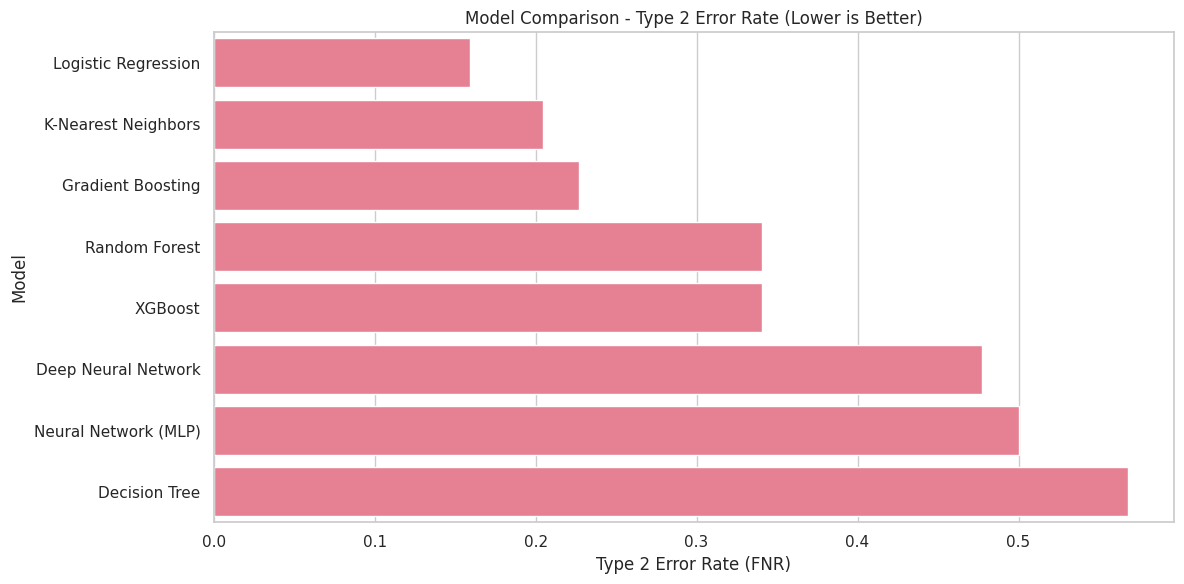

Model with lowest Type 2 error rate: Logistic Regression
Optimal threshold: 0.9100
Type 1 Error Rate (FPR): 0.1356
Type 2 Error Rate (FNR): 0.8182
Type 1 Errors (FP): 179
Type 2 Errors (FN): 36


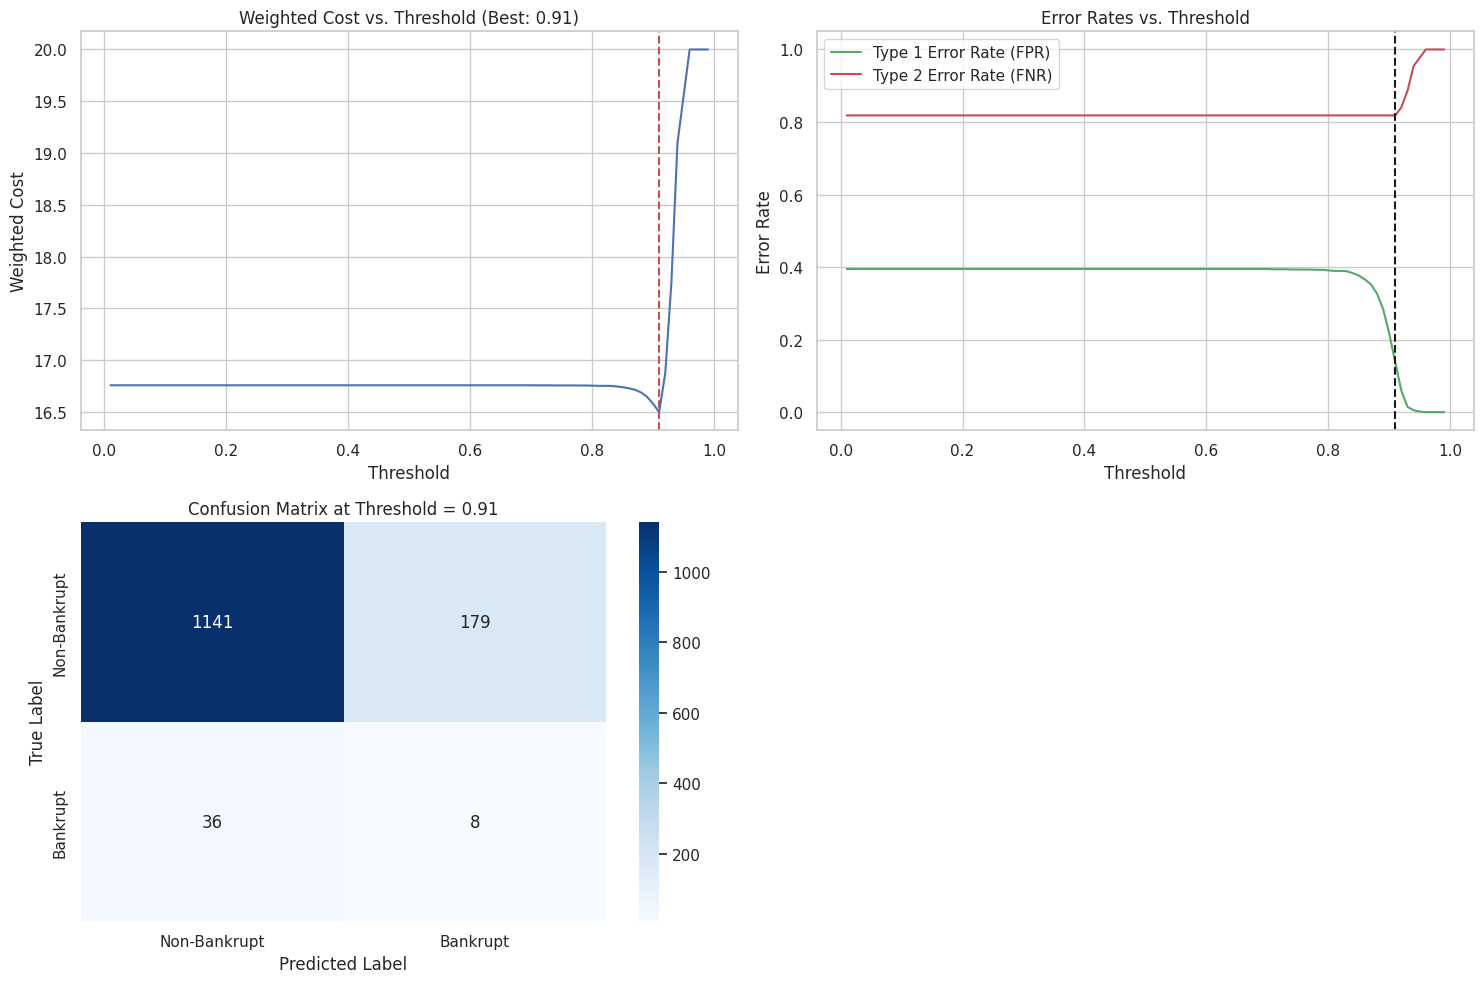

Feature comparison between missed bankruptcies and correctly classified bankruptcies:
                                                         Type 2 Error Mean  Correctly Classified Mean    Difference
Cash Turnover Rate                                            2.060656e+09                   0.000441  2.060656e+09
Cash/Total Assets                                             2.317560e-02                   0.119743 -9.656789e-02
Working Capital to Total Assets                               7.372455e-01                   0.789751 -5.250568e-02
Current Liability to Assets                                   1.539401e-01                   0.114627  3.931276e-02
ROA(C) before interest and depreciation before interest       4.286767e-01                   0.391873  3.680322e-02
Cash Flow to Total Assets                                     6.300747e-01                   0.664514 -3.443901e-02
Debt ratio %                                                  1.938977e-01                   0.161275 

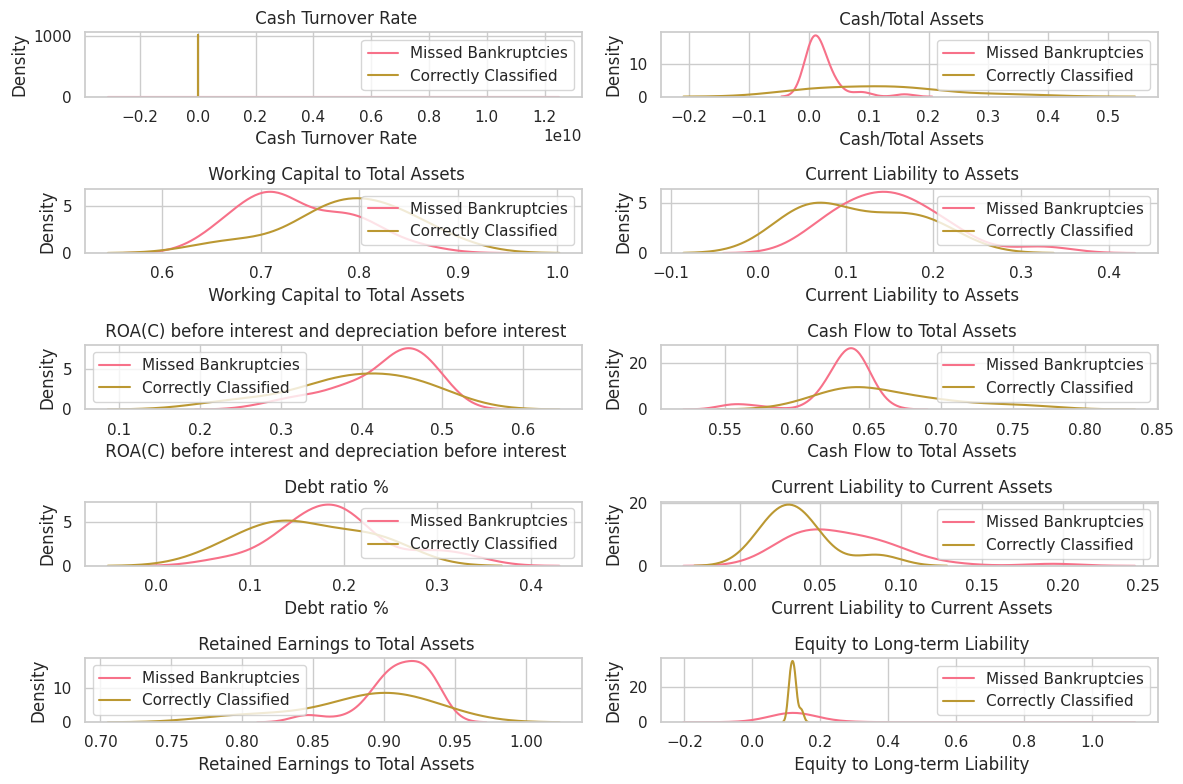

Cost-Based Evaluation:
True Negatives: 1141 x 0 = 0
False Positives (Type 1): 179 x 1 = 179
False Negatives (Type 2): 36 x 20 = 720
True Positives: 8 x 0 = 0
Total Cost: 899
Optimal threshold: 0.9100
Type 1 Error Rate (FPR): 0.1356
Type 2 Error Rate (FNR): 0.8182
Type 1 Errors (FP): 179
Type 2 Errors (FN): 36


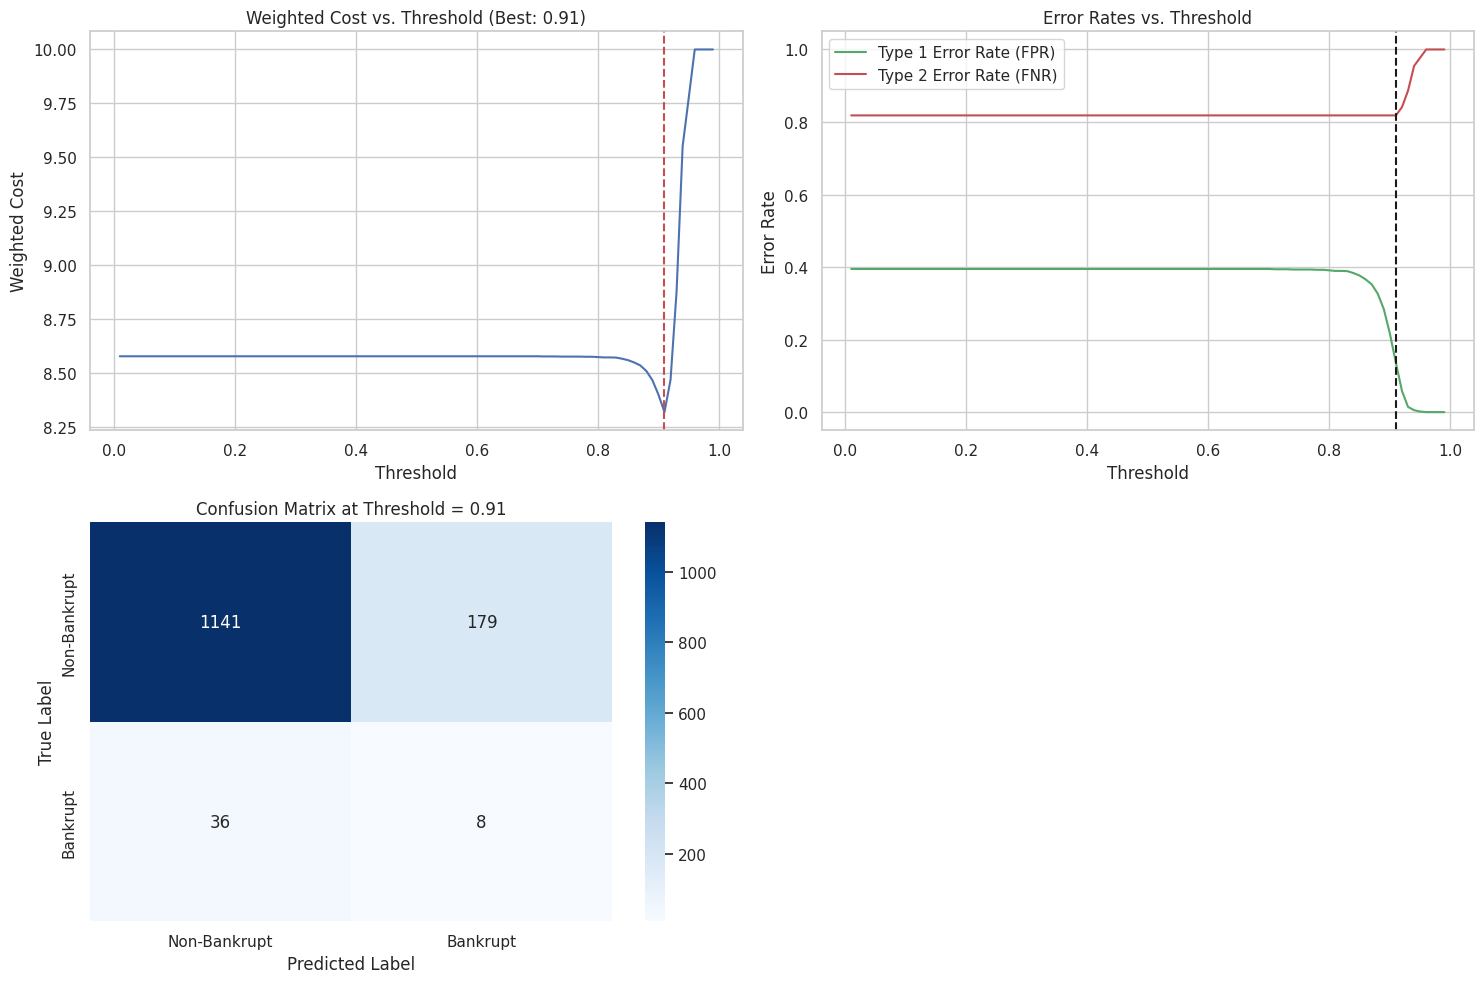

Optimal threshold: 0.2000
Type 1 Error Rate (FPR): 0.0000
Type 2 Error Rate (FNR): 1.0000
Type 1 Errors (FP): 0
Type 2 Errors (FN): 44


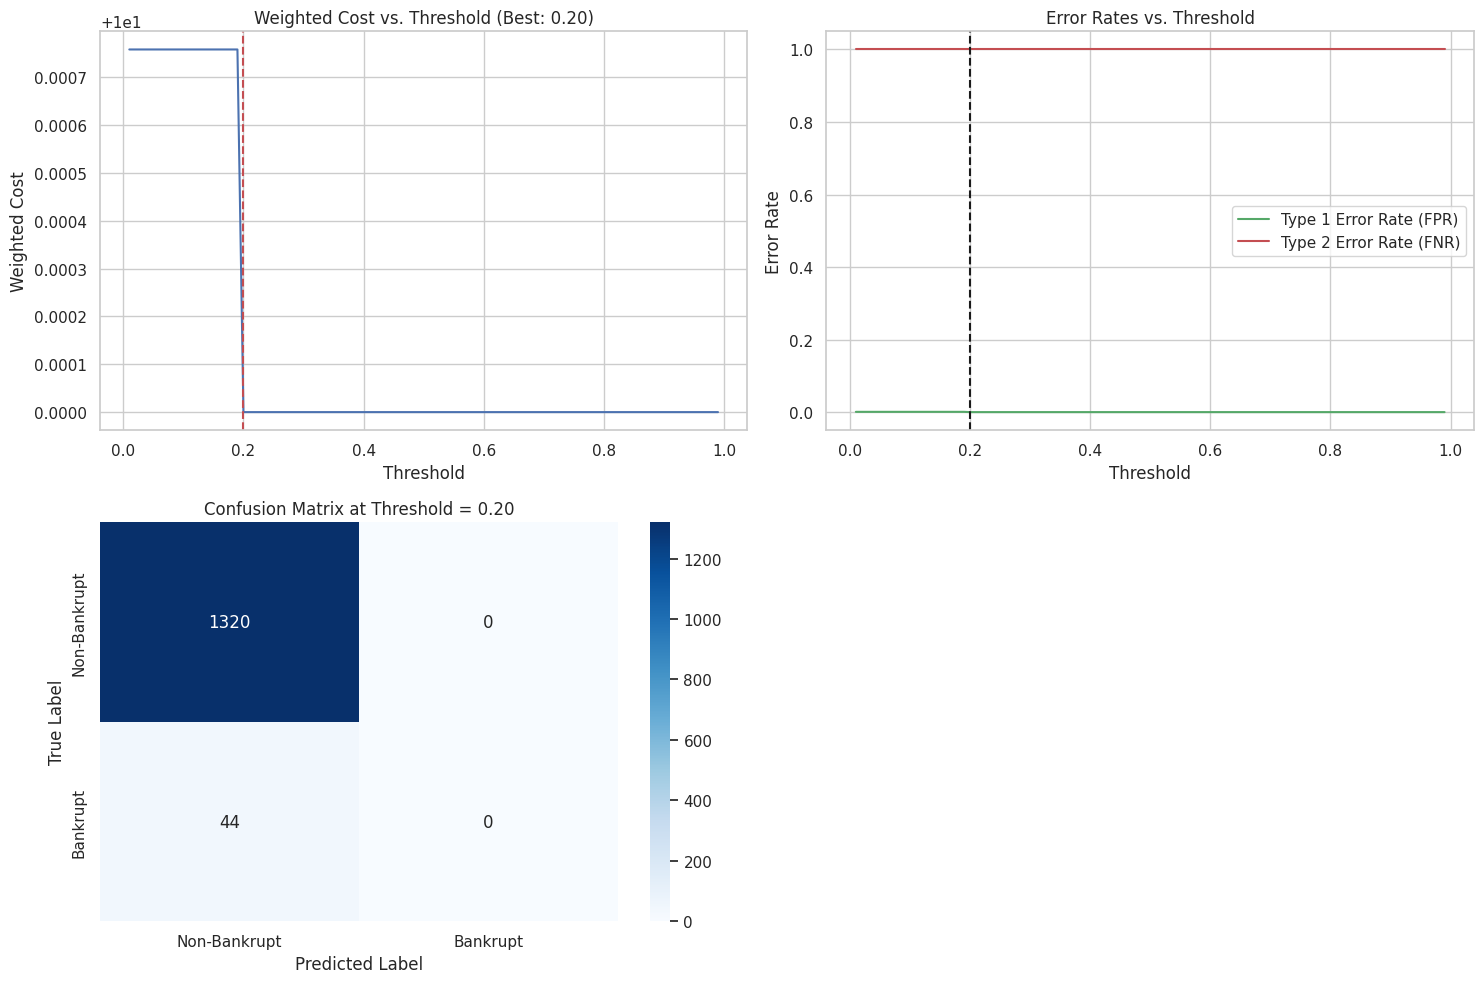

Optimal threshold: 0.0100
Type 1 Error Rate (FPR): 1.0000
Type 2 Error Rate (FNR): 0.0000
Type 1 Errors (FP): 1320
Type 2 Errors (FN): 0


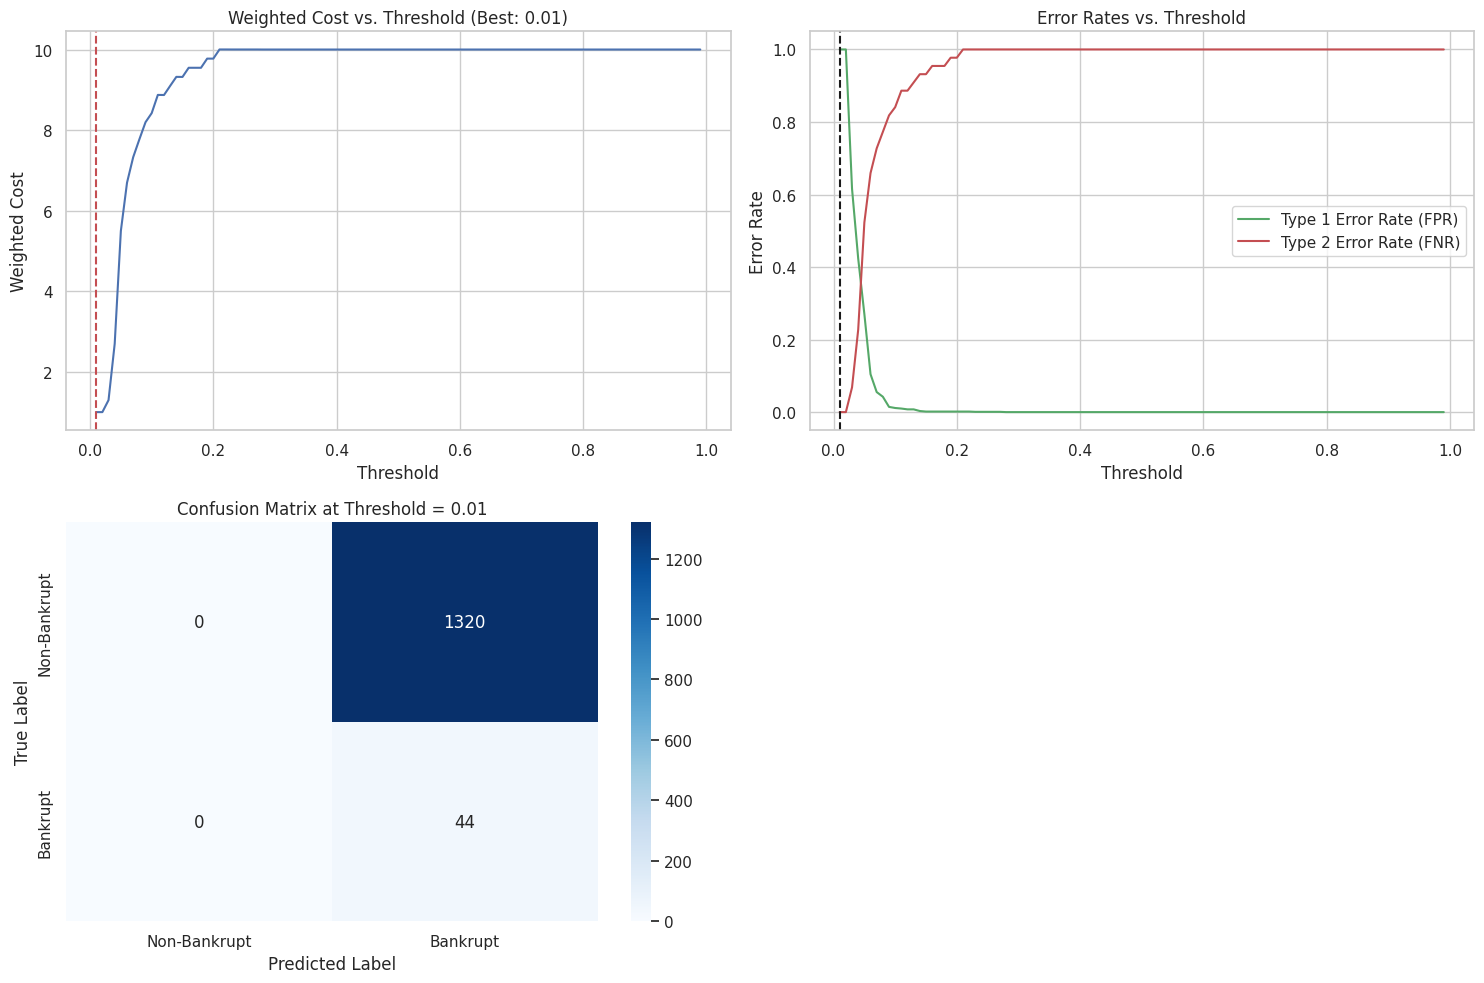

Ensemble Results:
Type 2 Error Rate: 0.0000
Type 2 Errors (Missed Bankruptcies): 0
Type 1 Errors (False Alarms): 1320
Accuracy: 0.0323


In [40]:
# 1. Evaluate Type 2 errors across all models
type2_comparison = compare_models_type2_errors(results, y_test)

# 2. Select the model with lowest Type 2 error rate
best_model_name = type2_comparison.iloc[0]['Model']
best_model = results[best_model_name]['model']
print(f"Model with lowest Type 2 error rate: {best_model_name}")

# 3. Optimize threshold specifically to minimize Type 2 errors
optimal_threshold = optimize_threshold_for_type2(best_model, X_test, y_test, cost_ratio=20)

# 4. Make predictions with the optimal threshold
y_prob = best_model.predict_proba(X_test)[:, 1]
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# 5. Analyze characteristics of missed bankruptcies
type2_cases = analyze_type2_error_cases(X_test, y_test, y_pred_optimal)

# 6. Evaluate with explicit cost matrix (Type 2 errors cost 20x Type 1 errors)
cost = evaluate_model_with_costs(y_test, y_pred_optimal, cost_matrix=[0, 1, 20, 0])

# 7. Create an ensemble focused on reducing Type 2 errors
# Select top 3 models with lowest Type 2 error rates
top_models = []
top_thresholds = []

for name in type2_comparison.head(3)['Model']:
    top_models.append(results[name]['model'])
    # Use optimized thresholds for each model
    if hasattr(results[name]['model'], 'predict_proba'):
        threshold = optimize_threshold_for_type2(results[name]['model'], X_test, y_test)
        top_thresholds.append(threshold)
    else:
        top_thresholds.append(0.5)

# Create Type 2 focused ensemble
ensemble_preds = type2_focused_ensemble(X_train, y_train, X_test, y_test,
                                       top_models, top_thresholds)

In [41]:
################################################

In [21]:
#######################################################################################

In [ ]:
important_features = [
    ' ROA(C) before interest and depreciation before interest',
    ' Operating Gross Margin',
    ' Cash flow rate',
    ' Debt ratio %',
    ' Current Ratio'
]

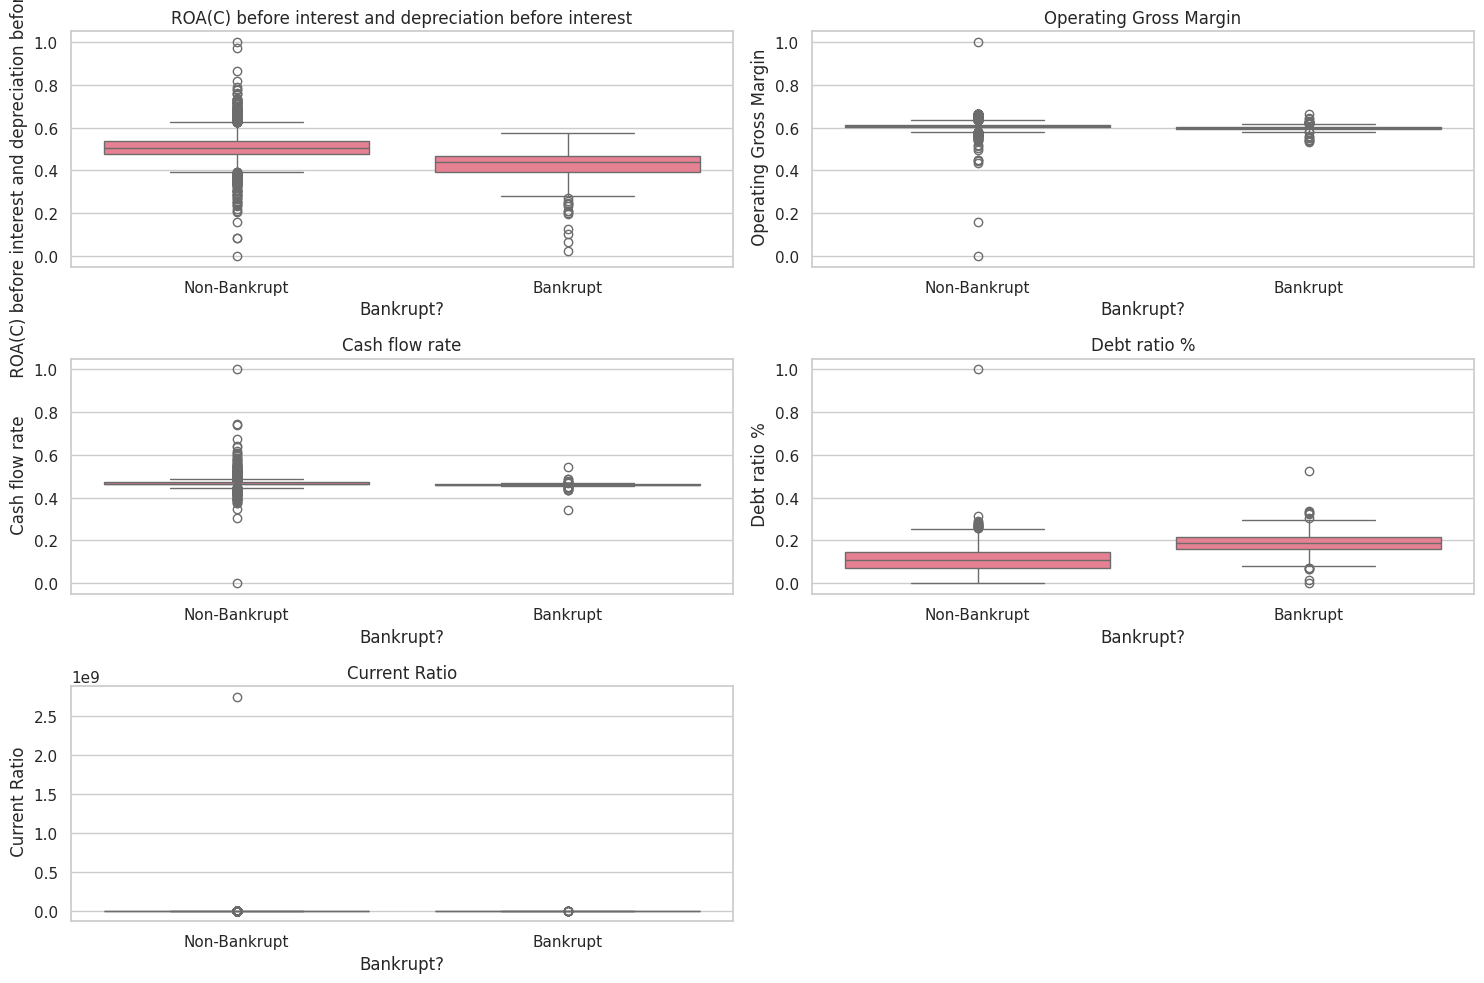

In [ ]:
# Create box plots
plt.figure(figsize=(15, 10))

for i, feature in enumerate(important_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Bankrupt?', y=feature, data=df)
    plt.title(feature.strip())  # Remove leading space in title
    plt.xticks([0, 1], ['Non-Bankrupt', 'Bankrupt'])

plt.tight_layout()
plt.show()

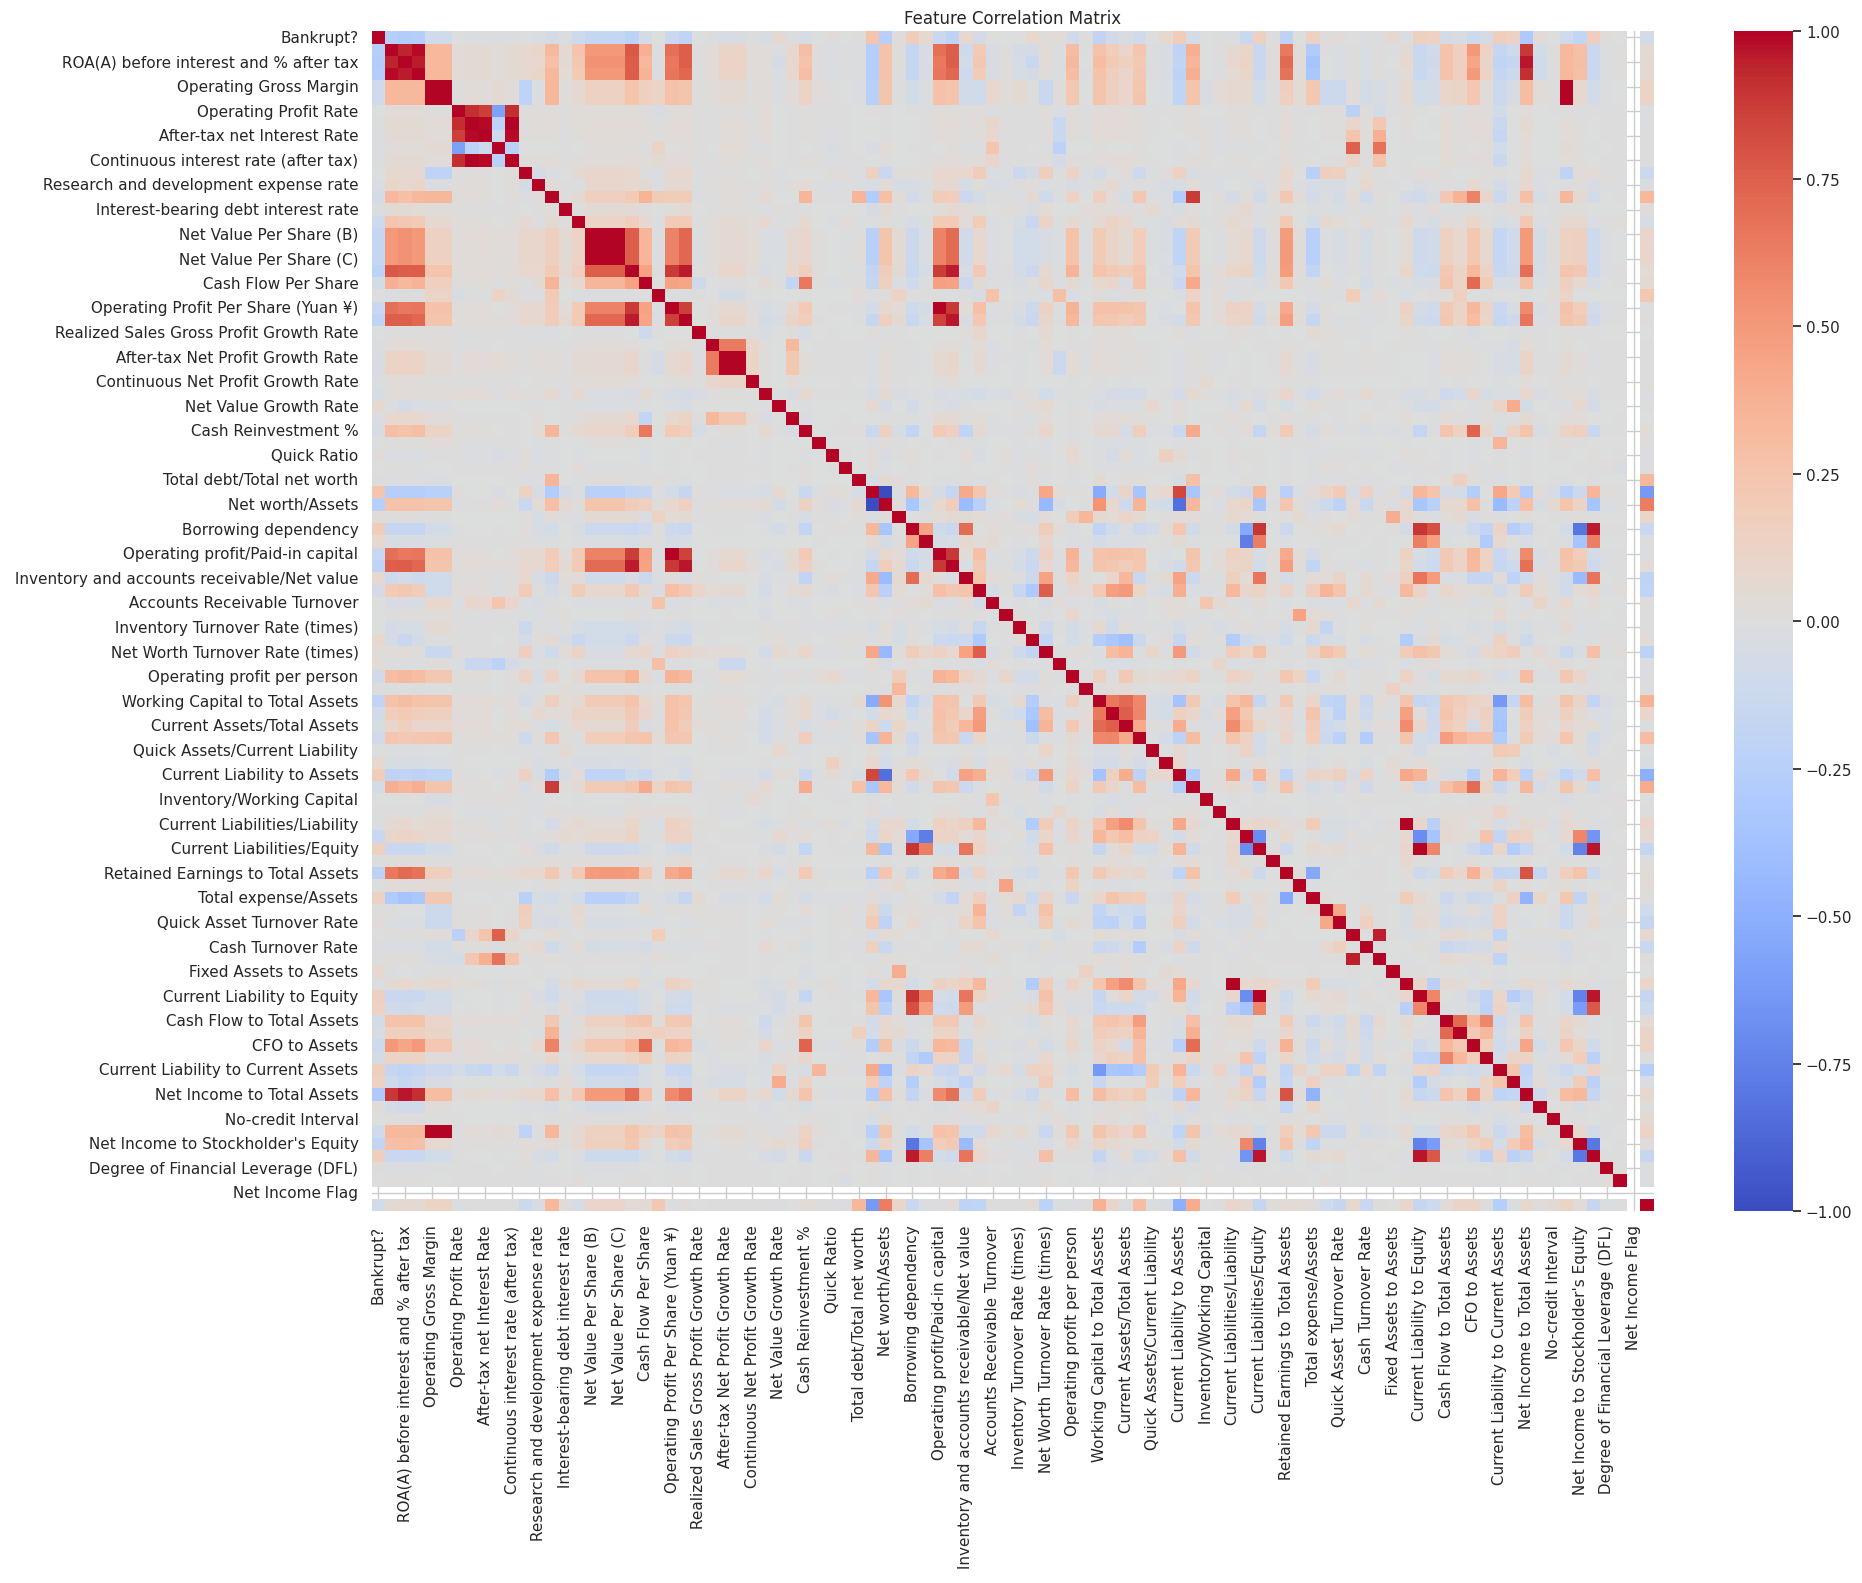

In [ ]:
# Correlation Analysis
correlations = df.corr()

# Create correlation heatmap using seaborn
plt.figure(figsize=(20, 16))
sns.heatmap(correlations, cmap='coolwarm', center=0, annot=False)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
# Top correlations with bankruptcy
bankruptcy_correlations = correlations['Bankrupt?'].sort_values(ascending=False)
print("\nTop 10 Features Most Correlated with Bankruptcy:")
display(bankruptcy_correlations[1:11])


Top 10 Features Most Correlated with Bankruptcy:


Debt ratio %                           0.250161
Current Liability to Assets            0.194494
Borrowing dependency                   0.176543
Current Liability to Current Assets    0.171306
Liability to Equity                    0.166812
Current Liabilities/Equity             0.153828
Current Liability to Equity            0.153828
Liability-Assets Flag                  0.139212
Total expense/Assets                   0.139049
Equity to Long-term Liability          0.139014
Name: Bankrupt?, dtype: float64

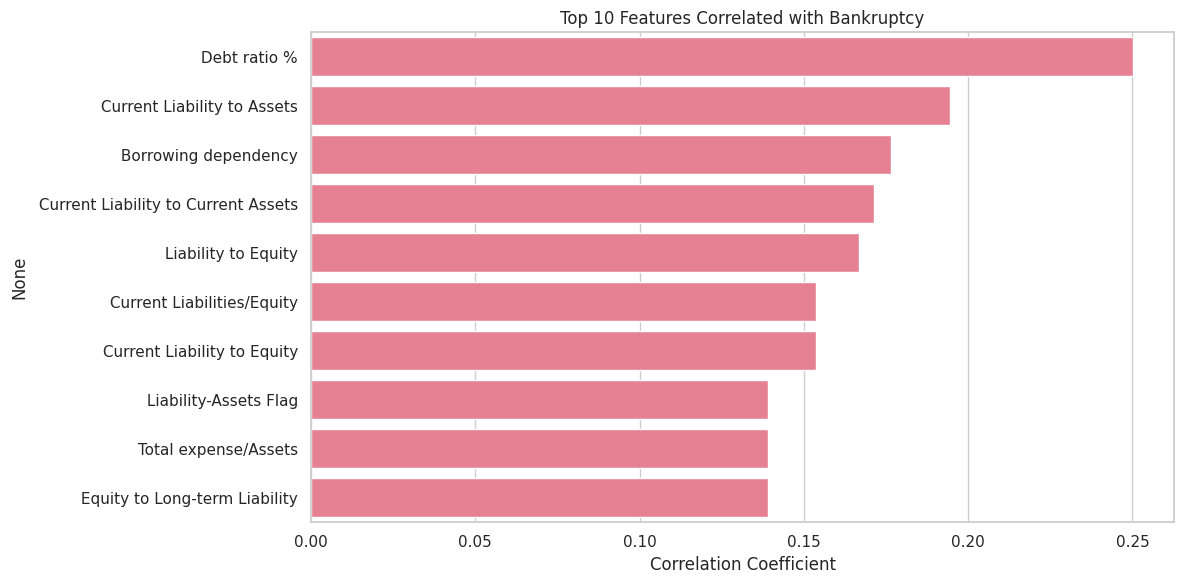

In [ ]:
# Visualize top correlations
plt.figure(figsize=(12, 6))
top_corr = bankruptcy_correlations[1:11]
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title('Top 10 Features Correlated with Bankruptcy')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

In [ ]:
# Feature Distribution Analysis
plt.figure(figsize=(15, 10))
for i, feature in enumerate(important_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=feature, hue='Bankrupt?', multiple="layer", alpha=.6)
    plt.title(f'Distribution of {feature.strip()}')
plt.tight_layout()
plt.show()


In [ ]:
# Summary Statistics
print("\nDataset Summary:")
print(f"Number of features: {df.shape[1] - 1}")  # Excluding target variable
print(f"Number of samples: {df.shape[0]}")
print(f"Class imbalance ratio: {len(df[df['Bankrupt?'] == 0]) / len(df[df['Bankrupt?'] == 1]):.2f}:1")


In [ ]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
print(f"\nNumber of numeric features: {len(numeric_features)}")

print("\nValue ranges for key metrics:")
for feature in important_features:
    print(f"\n{feature.strip()}:")
    print(f"  Min: {df[feature].min():.2f}")
    print(f"  Max: {df[feature].max():.2f}")
    print(f"  Mean: {df[feature].mean():.2f}")
    print(f"  Median: {df[feature].median():.2f}")
    print(f"  Std: {df[feature].std():.2f}")

In [ ]:
# Calculate and display skewness for important features
print("\nSkewness of important features:")
for feature in important_features:
    skew = df[feature].skew()
    print(f"{feature.strip()}: {skew:.2f}")

In [ ]:
# Display summary statistics by bankruptcy status
print("\nSummary statistics by bankruptcy status:")
for feature in important_features:
    print(f"\n{feature.strip()}:")
    display(df.groupby('Bankrupt?')[feature].describe())